# DATA LOADING

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import fetch_openml
#get adult data
adult = fetch_openml(name='adult', version=2, as_frame=True)
df = adult.frame
df

age     workclass  fnlwgt     education  education-num  \
0       25       Private  226802          11th              7   
1       38       Private   89814       HS-grad              9   
2       28     Local-gov  336951    Assoc-acdm             12   
3       44       Private  160323  Some-college             10   
4       18           NaN  103497  Some-college             10   
...    ...           ...     ...           ...            ...   
48837   27       Private  257302    Assoc-acdm             12   
48838   40       Private  154374       HS-grad              9   
48839   58       Private  151910       HS-grad              9   
48840   22       Private  201490       HS-grad              9   
48841   52  Self-emp-inc  287927       HS-grad              9   

           marital-status         occupation relationship   race     sex  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                NaN    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country  class  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

# 1.Data Cleaning

In [ ]:
rows, columns = df.shape
rows,columns

(48842, 15)

In [ ]:
df.duplicated().sum()

52

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isna().sum()

age                  0
workclass         2795
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2805
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
class                0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.rename(columns={'class': 'income'}, inplace=True)

# 2 Data Visualization

In [ ]:
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  45175.000000  4.517500e+04   45175.000000  45175.000000  45175.000000   
mean      38.556170  1.897388e+05      10.119314   1102.576270     88.687593   
std       13.215349  1.056524e+05       2.551740   7510.249876    405.156611   
min       17.000000  1.349200e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.173925e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783120e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.379030e+05      13.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    45175.000000  
mean        40.942512  
std         12.007730  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45175 non-null  int64   
 1   workclass       45175 non-null  category
 2   fnlwgt          45175 non-null  int64   
 3   education       45175 non-null  category
 4   education-num   45175 non-null  int64   
 5   marital-status  45175 non-null  category
 6   occupation      45175 non-null  category
 7   relationship    45175 non-null  category
 8   race            45175 non-null  category
 9   sex             45175 non-null  category
 10  capital-gain    45175 non-null  int64   
 11  capital-loss    45175 non-null  int64   
 12  hours-per-week  45175 non-null  int64   
 13  native-country  45175 non-null  category
 14  income          45175 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.8 MB


In [ ]:
df['AGE_CATEGORY'] = pd.cut(df['age'],bins=[0,18,45,60,100],labels=['Teenager','Adults','Mid Adults','Elderly'])
df['AGE_CATEGORY']

0            Adults
1            Adults
2            Adults
3            Adults
5            Adults
            ...    
48837        Adults
48838        Adults
48839    Mid Adults
48840        Adults
48841    Mid Adults
Name: AGE_CATEGORY, Length: 45175, dtype: category
Categories (4, object): ['Teenager' < 'Adults' < 'Mid Adults' < 'Elderly']

**Relationship among categorical variables**

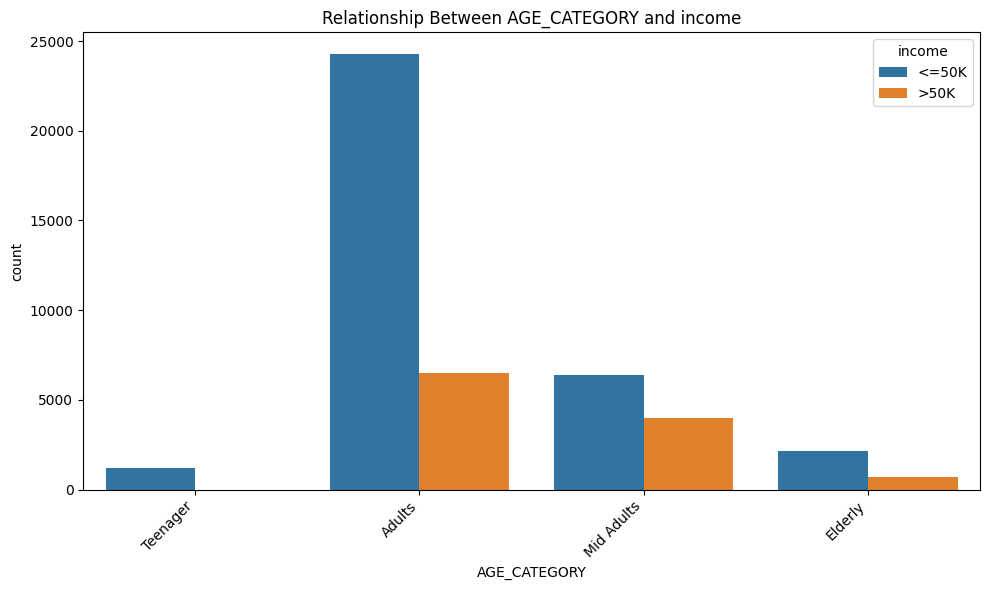

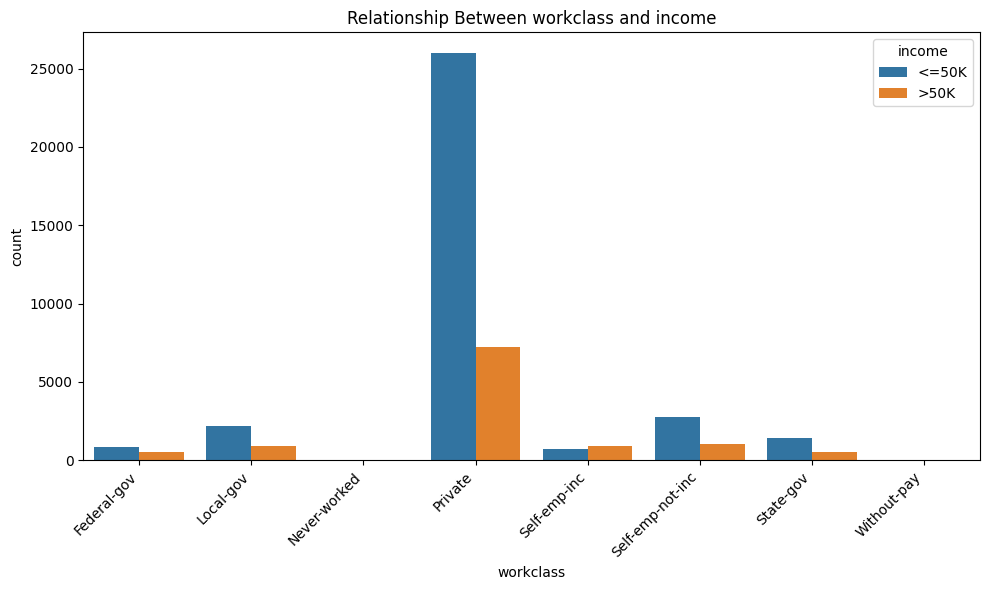

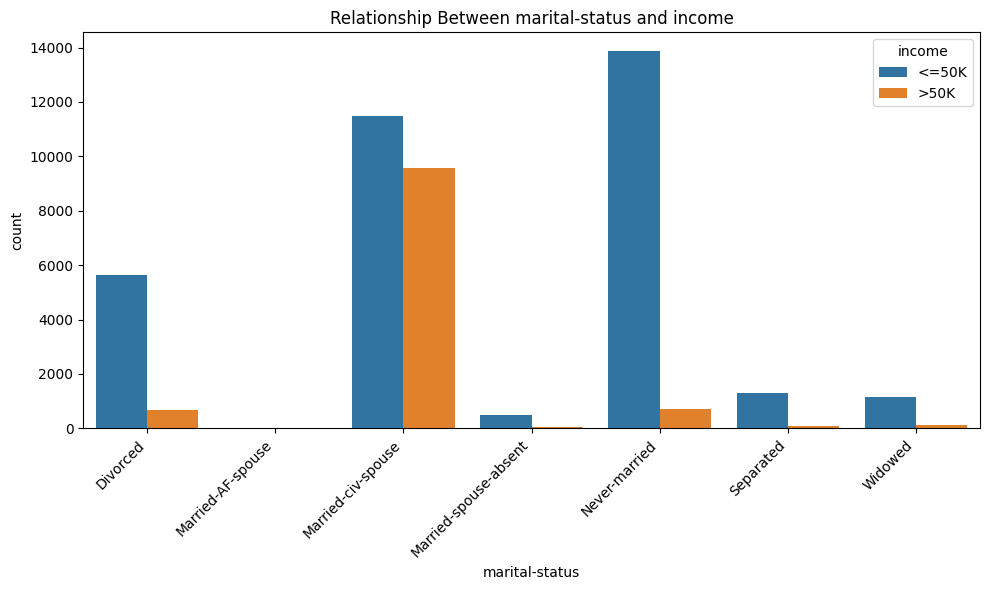

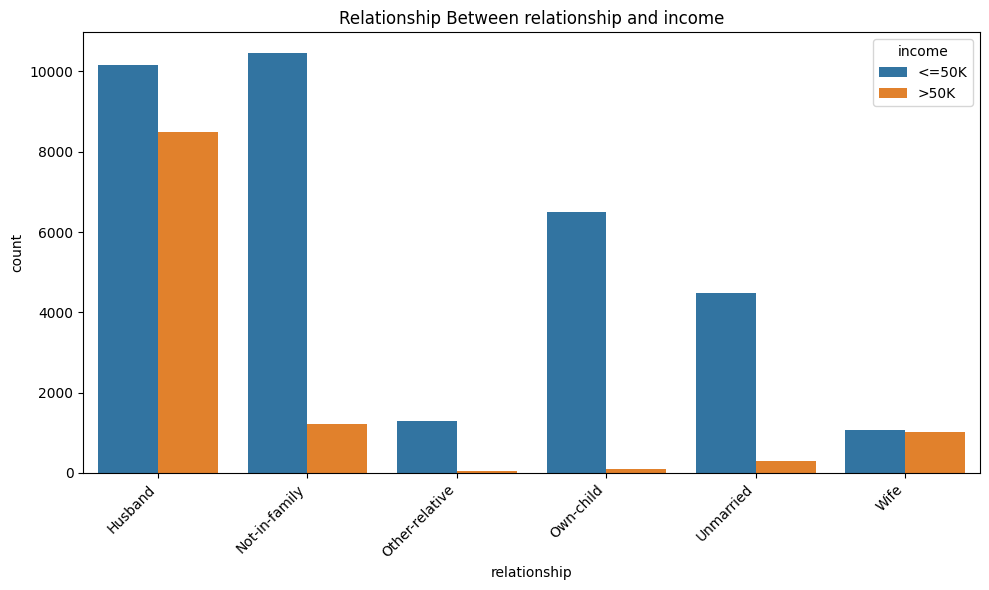

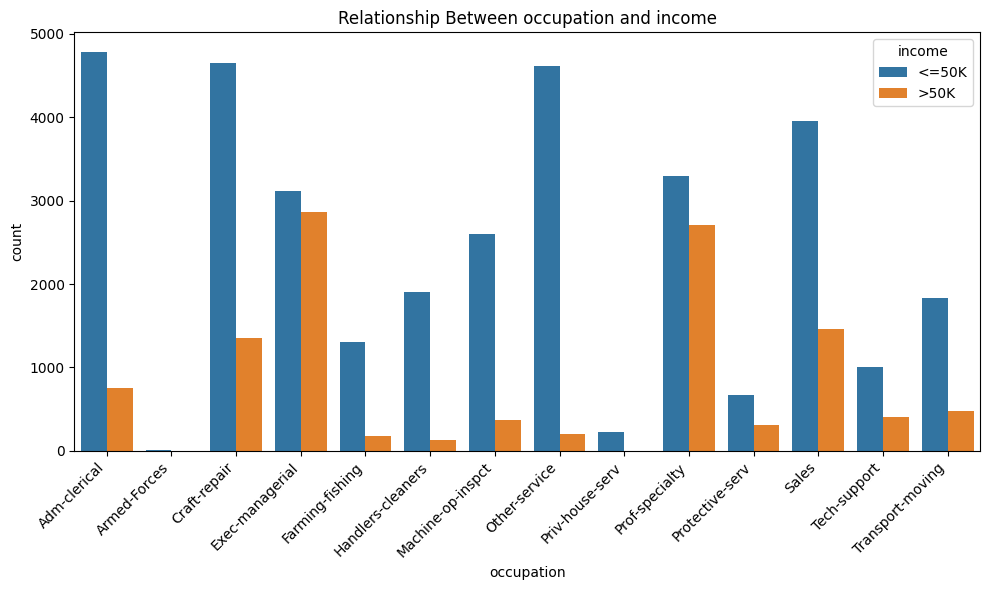

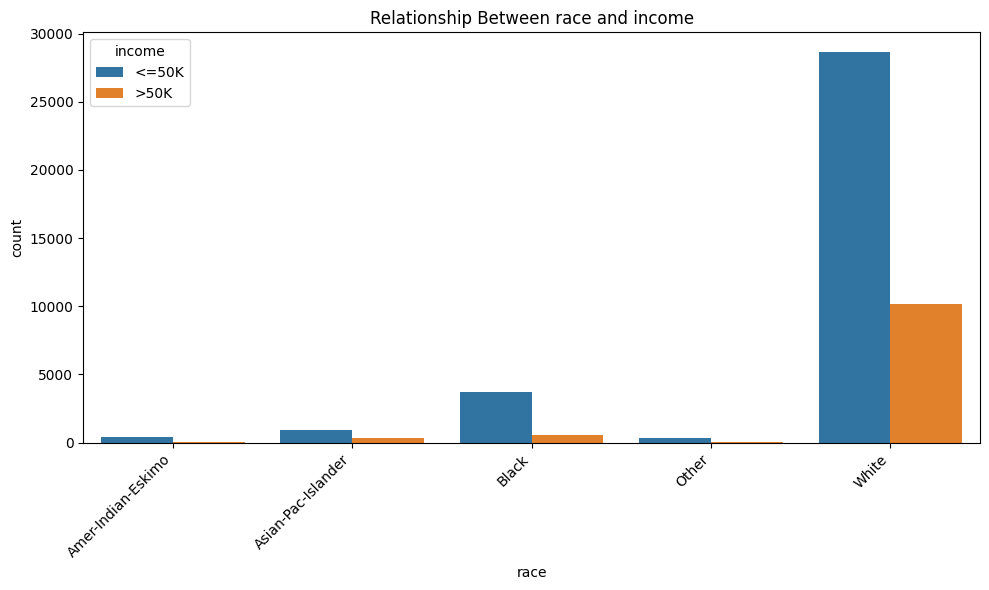

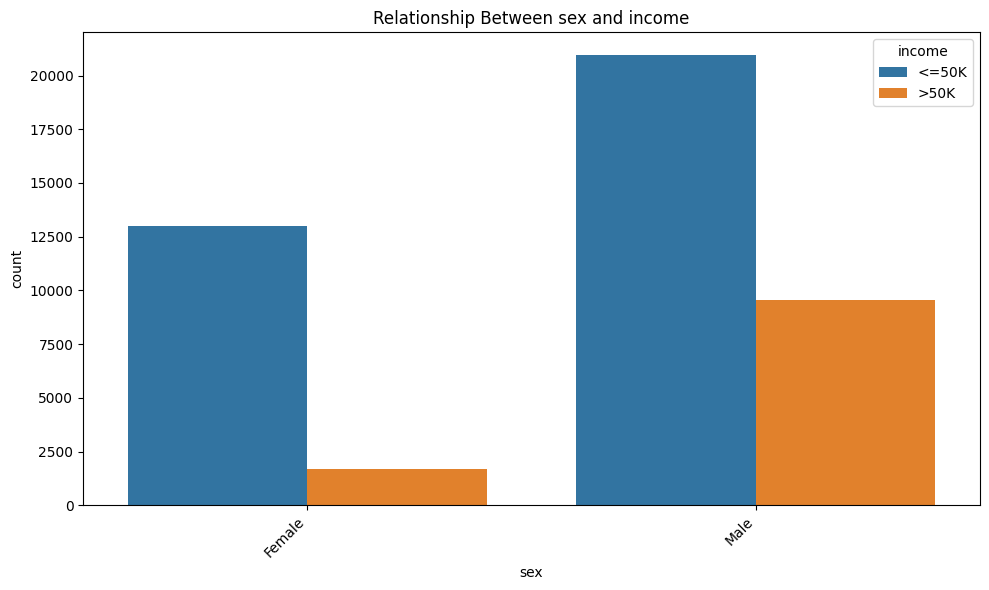

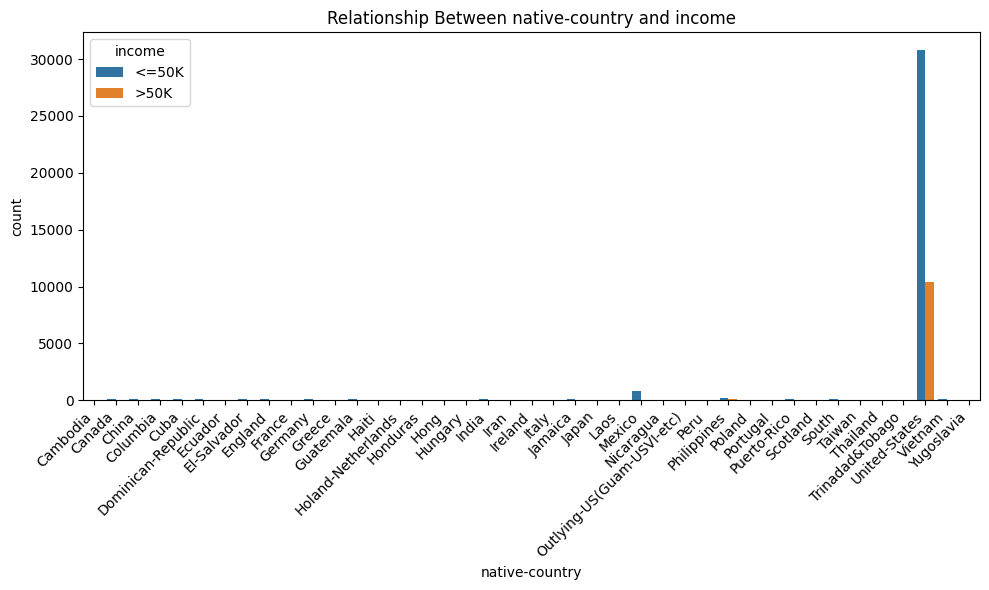

In [ ]:
cat_features = ['AGE_CATEGORY', 'workclass', 'marital-status', 'relationship', 'occupation', 'race', 'sex', 'native-country']

for feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='income', data=df)
    plt.title(f'Relationship Between {feature} and income')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


**Relationship among numercial variables**

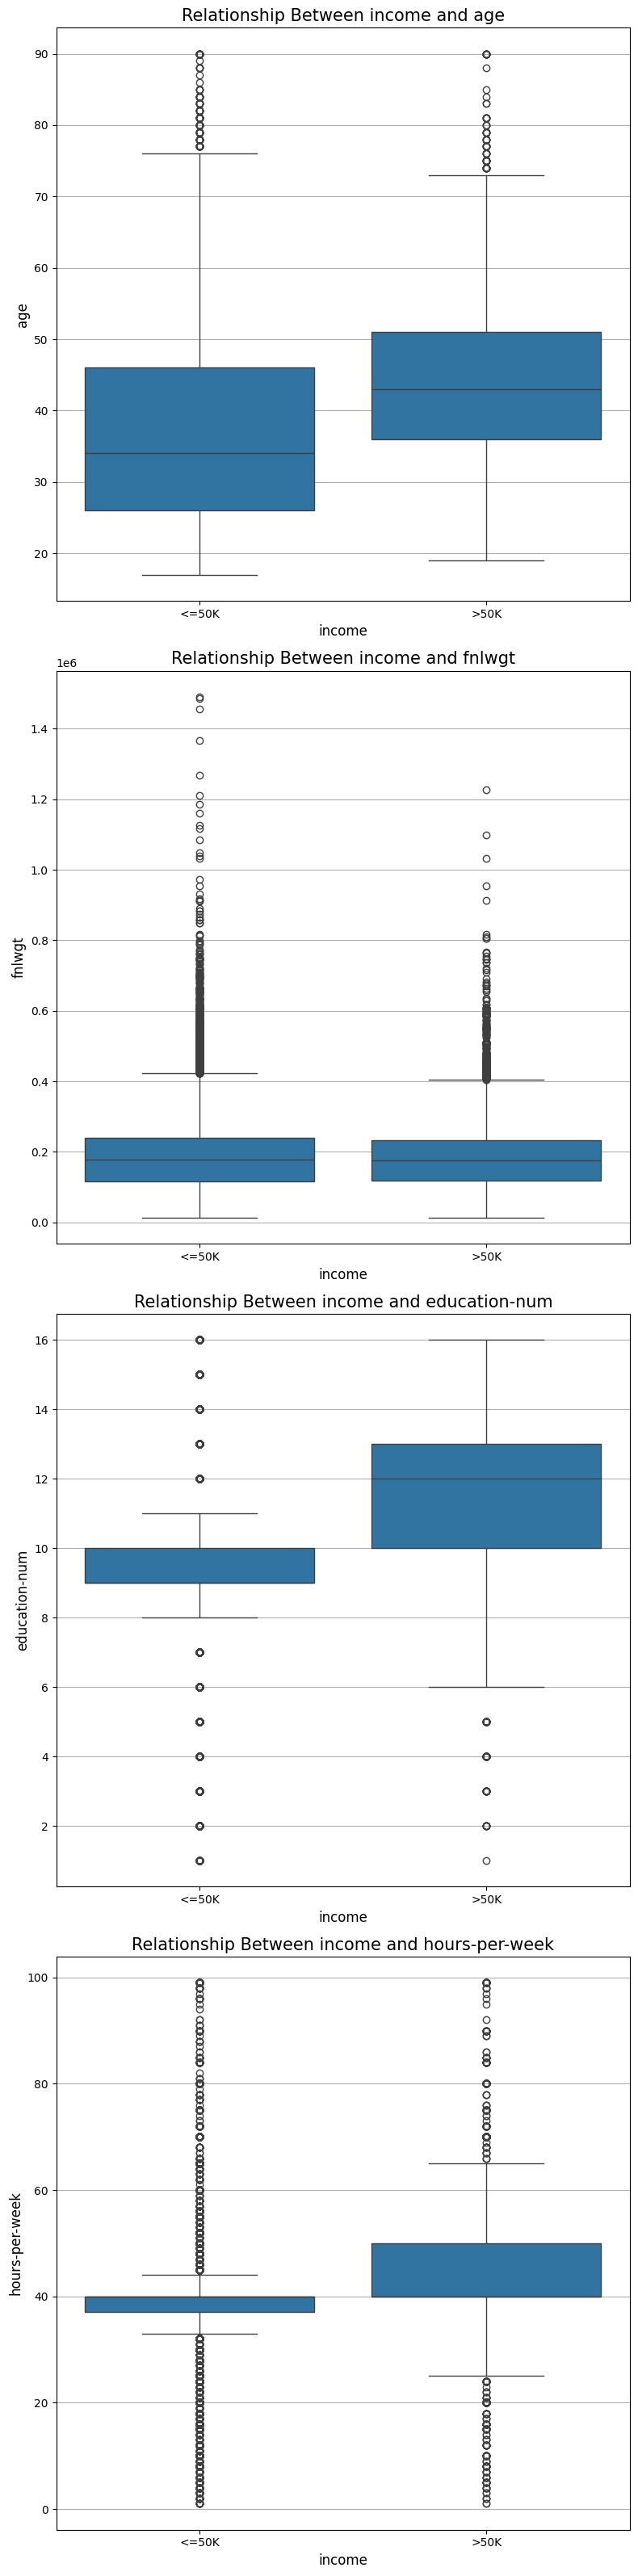

In [ ]:
num_features=['age', 'fnlwgt', 'education-num', 'hours-per-week']
fig, axes = plt.subplots(len(num_features), 1, figsize=(8,32))

for i, column in enumerate(num_features):
    plt.sca(axes[i])
    sns.boxplot(data=df, x='income', y=column)
    plt.xlabel('income', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'Relationship Between income and {column}', fontsize=15)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

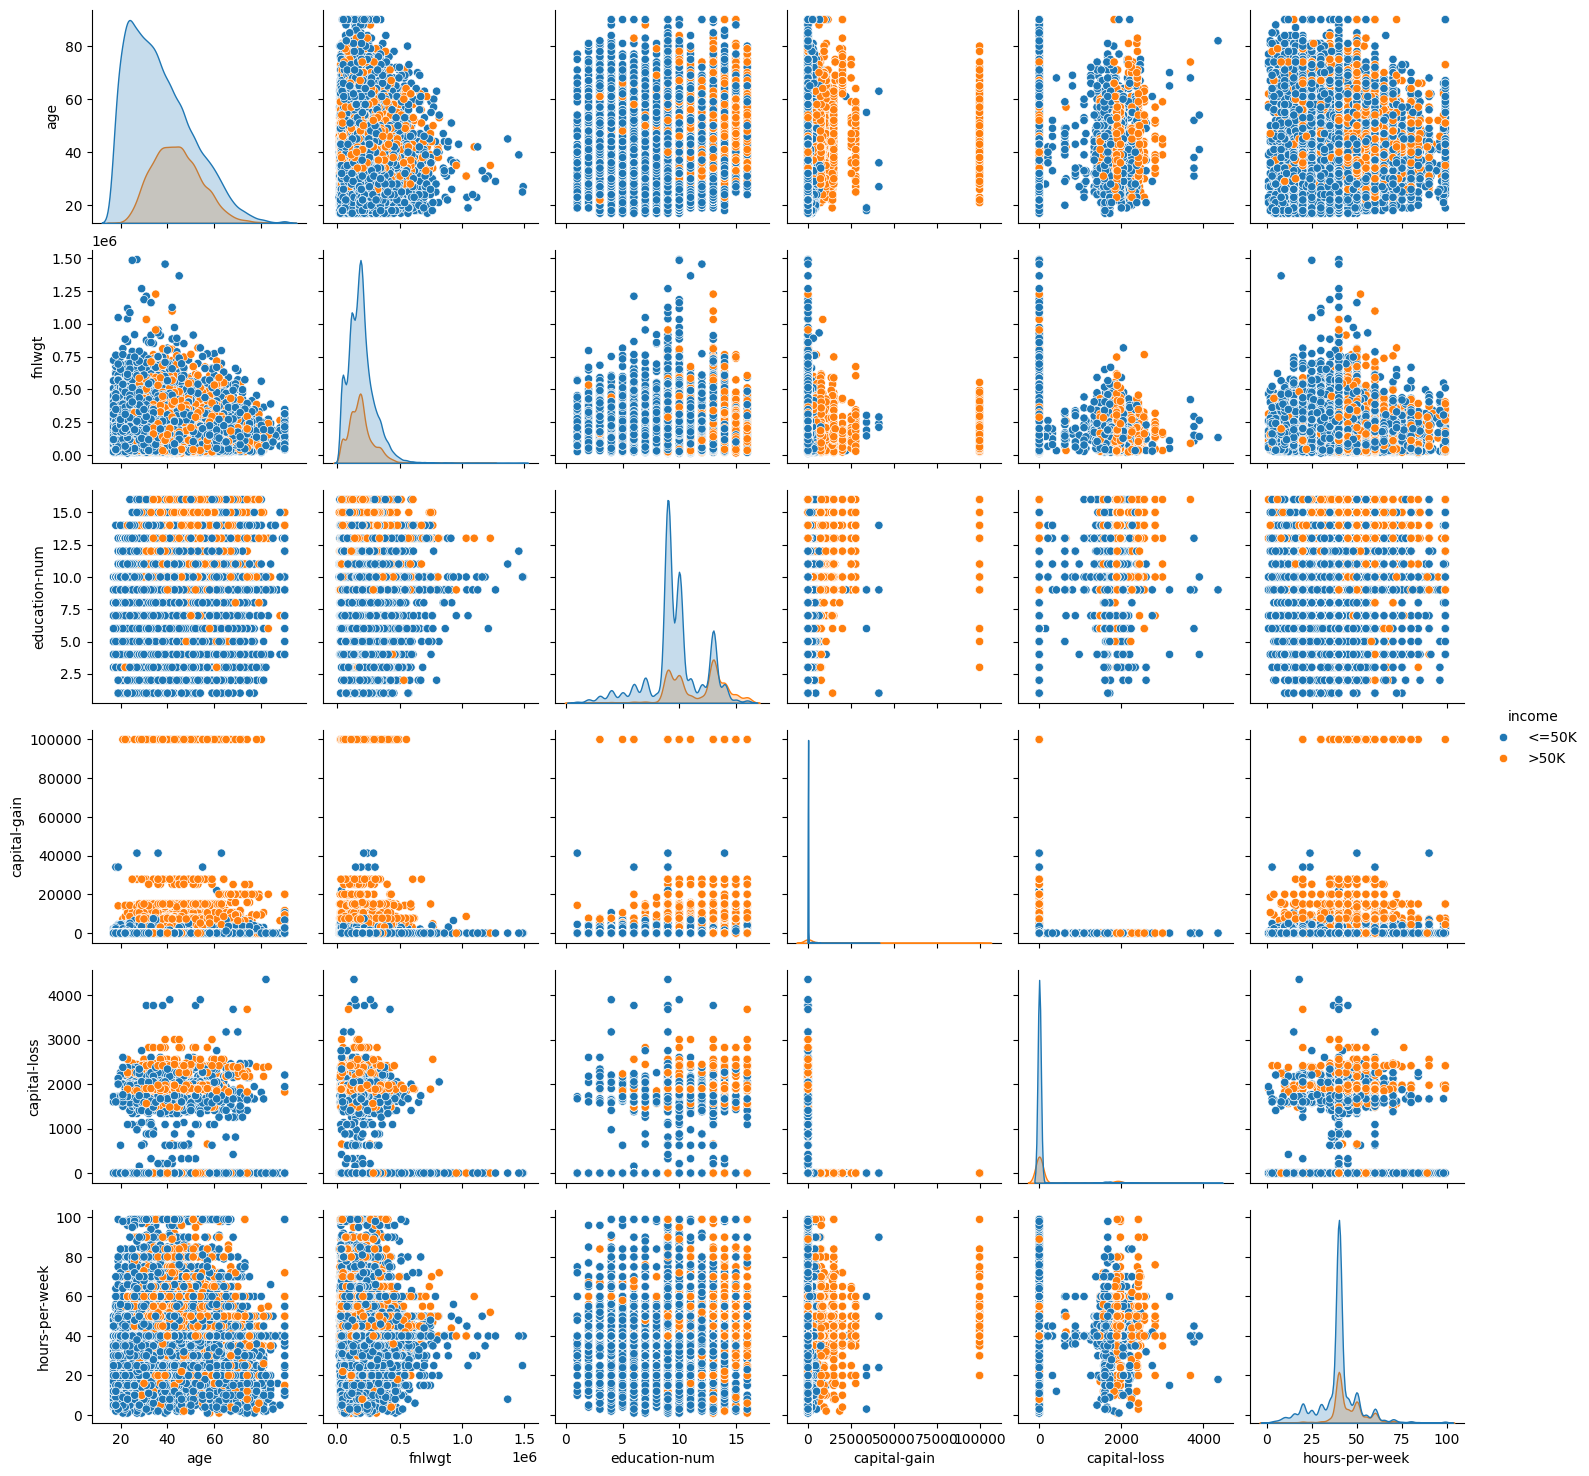

In [ ]:
sns.pairplot(df,hue='income') #the realtionship between varibles

**"Education's Impact on Career and Income"**

In [ ]:
df.education.unique()

['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', ..., '9th', 'Doctorate', '12th', '1st-4th', 'Preschool']
Length: 16
Categories (16, object): ['10th', '11th', '12th', '1st-4th', ..., 'Masters', 'Preschool',
                          'Prof-school', 'Some-college']

In [ ]:
def cat_education(education):
  if education in ['7th-8th','9th','10th','11th','12th']:
    return 'HS_school_not_grad'
  elif education in ['1st-4th', '5th-6th', 'Preschool']:
    return 'primary_school'
  else:
    return education
df2=df.copy()
df2['education']=df2['education'].apply(cat_education)
df2['education']

0        HS_school_not_grad
1                   HS-grad
2                Assoc-acdm
3              Some-college
5        HS_school_not_grad
                ...        
48837            Assoc-acdm
48838               HS-grad
48839               HS-grad
48840               HS-grad
48841               HS-grad
Name: education, Length: 45175, dtype: object

In [ ]:
import plotly.graph_objects as go
import pandas as pd
df2_alluvial = df2.groupby(['education', 'occupation', 'income'])['income'].count().reset_index(name='counts')

# Create nodes and links of data- Education Career Income
nodes = list(set(df2_alluvial['education'].unique()) | set(df2_alluvial['occupation'].unique()) | set(df2_alluvial['income'].unique()))
node_dict = {node: i for i, node in enumerate(nodes)}
links = []
for index, row in df2_alluvial.iterrows():
    # education to occupation link
    source = node_dict[row['education']]
    target = node_dict[row['occupation']]
    value = row['counts']
    links.append({'source': source, 'target': target, 'value': value})

    # occupation to income link
    source = node_dict[row['occupation']]
    target = node_dict[row['income']]
    value = row['counts']
    links.append({'source': source, 'target': target, 'value': value})

# alluvial plot
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 20,
      thickness = 40,
      line = dict(color = "black", width = 0.5),
      label = nodes,  # 使用 nodes 作為標籤
      color = "brown"
    ),
    link = dict(
      source = [link['source'] for link in links],
      target = [link['target'] for link in links],
      value = [link['value'] for link in links]
  ))])

fig.update_layout(title_text="Education's Impact on Career and Income", font_size=10,width=2000,height=1400)
fig.show()
#download the below pic

<ipython-input-108-d992239dd87f>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# 3 Data preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45175 non-null  int64   
 1   workclass       45175 non-null  category
 2   fnlwgt          45175 non-null  int64   
 3   education       45175 non-null  category
 4   education-num   45175 non-null  int64   
 5   marital-status  45175 non-null  category
 6   occupation      45175 non-null  category
 7   relationship    45175 non-null  category
 8   race            45175 non-null  category
 9   sex             45175 non-null  category
 10  capital-gain    45175 non-null  int64   
 11  capital-loss    45175 non-null  int64   
 12  hours-per-week  45175 non-null  int64   
 13  native-country  45175 non-null  category
 14  income          45175 non-null  category
 15  AGE_CATEGORY    45175 non-null  category
dtypes: category(10), int64(6)
memory usage: 2.8 MB


## 3.1 numerical features

### 3.1.1 Skewed Distribution

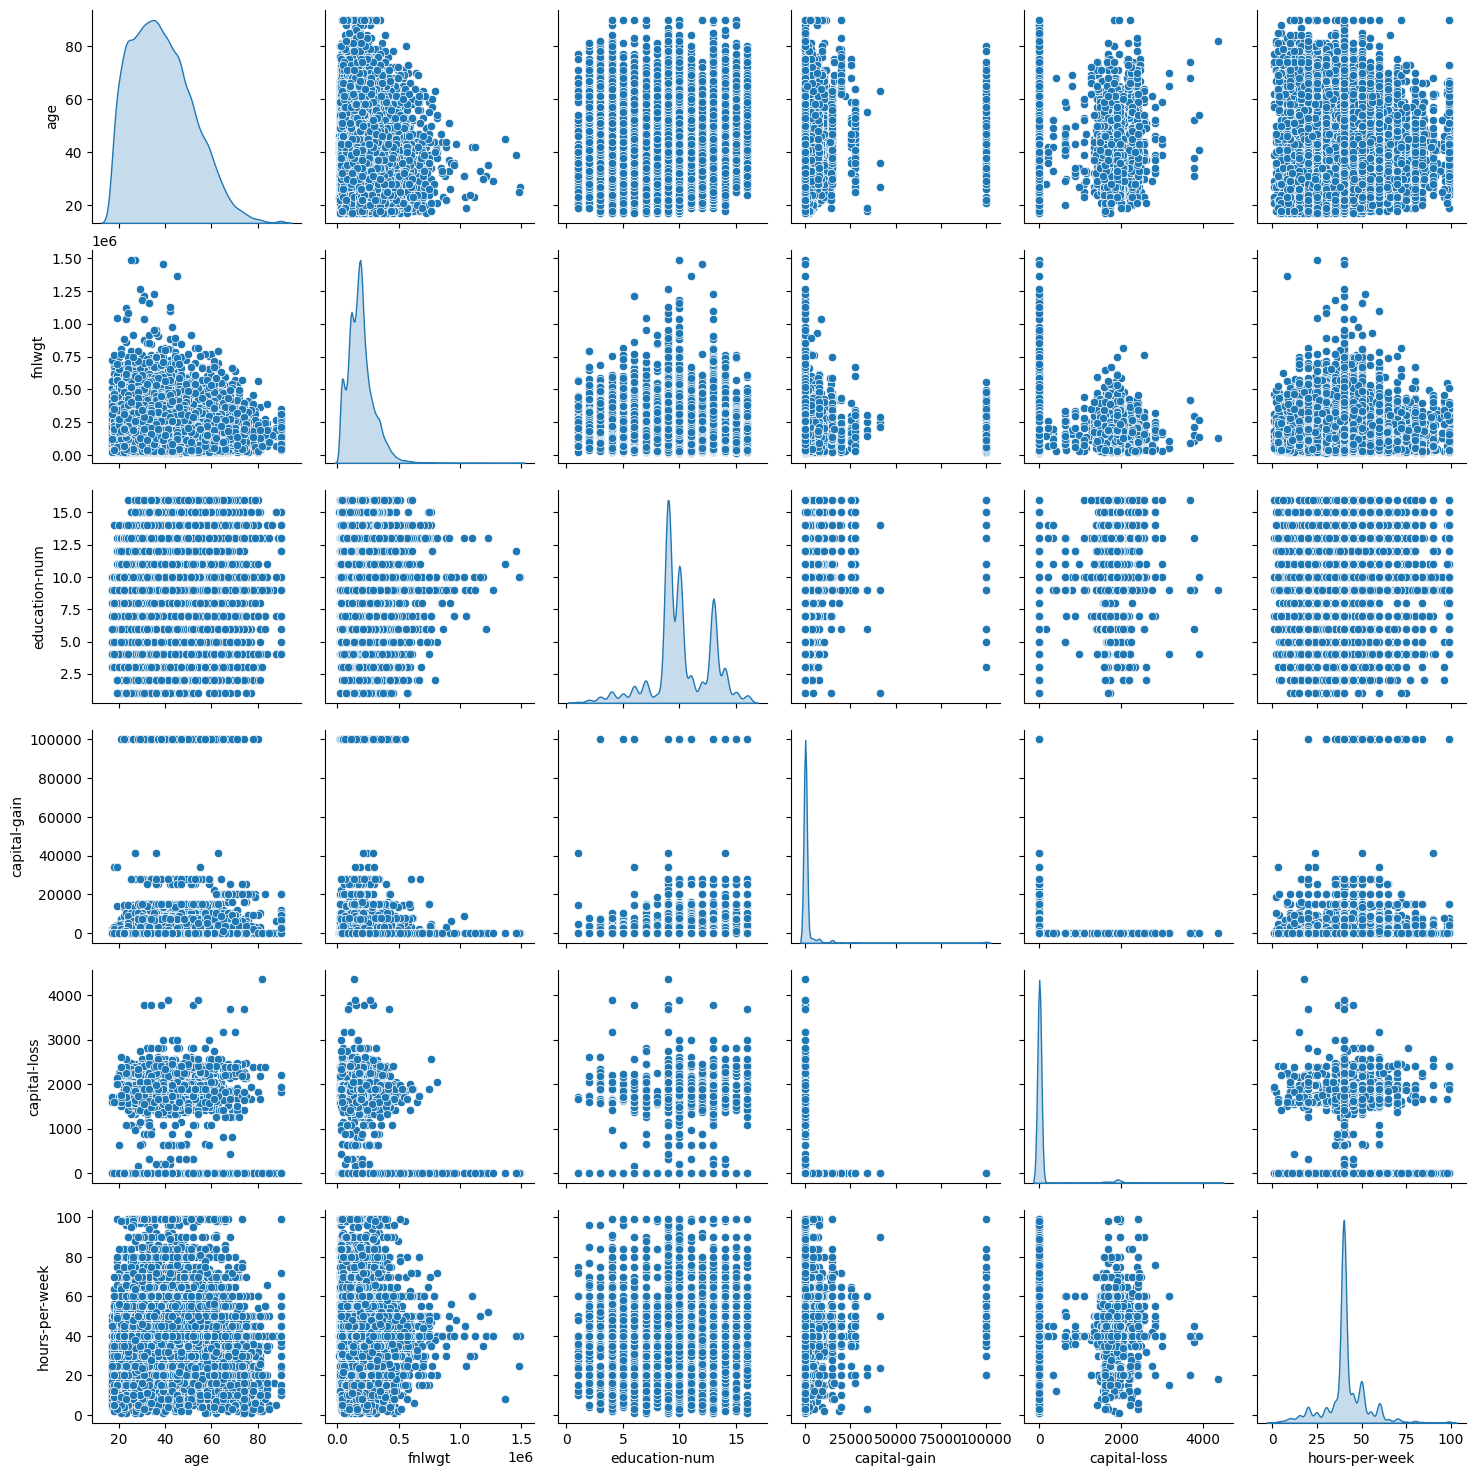

In [ ]:
sns.pairplot(df, diag_kind='kde')

# show picture
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis
#  skewed distributions
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for feature in numeric_features:
    # caculate skewed
    skewness = skew(df[feature].dropna(), bias=False)
    # is skew >1 or <1 then log()
    if abs(skewness) > 1:
        df[feature] = np.log1p(df[feature])

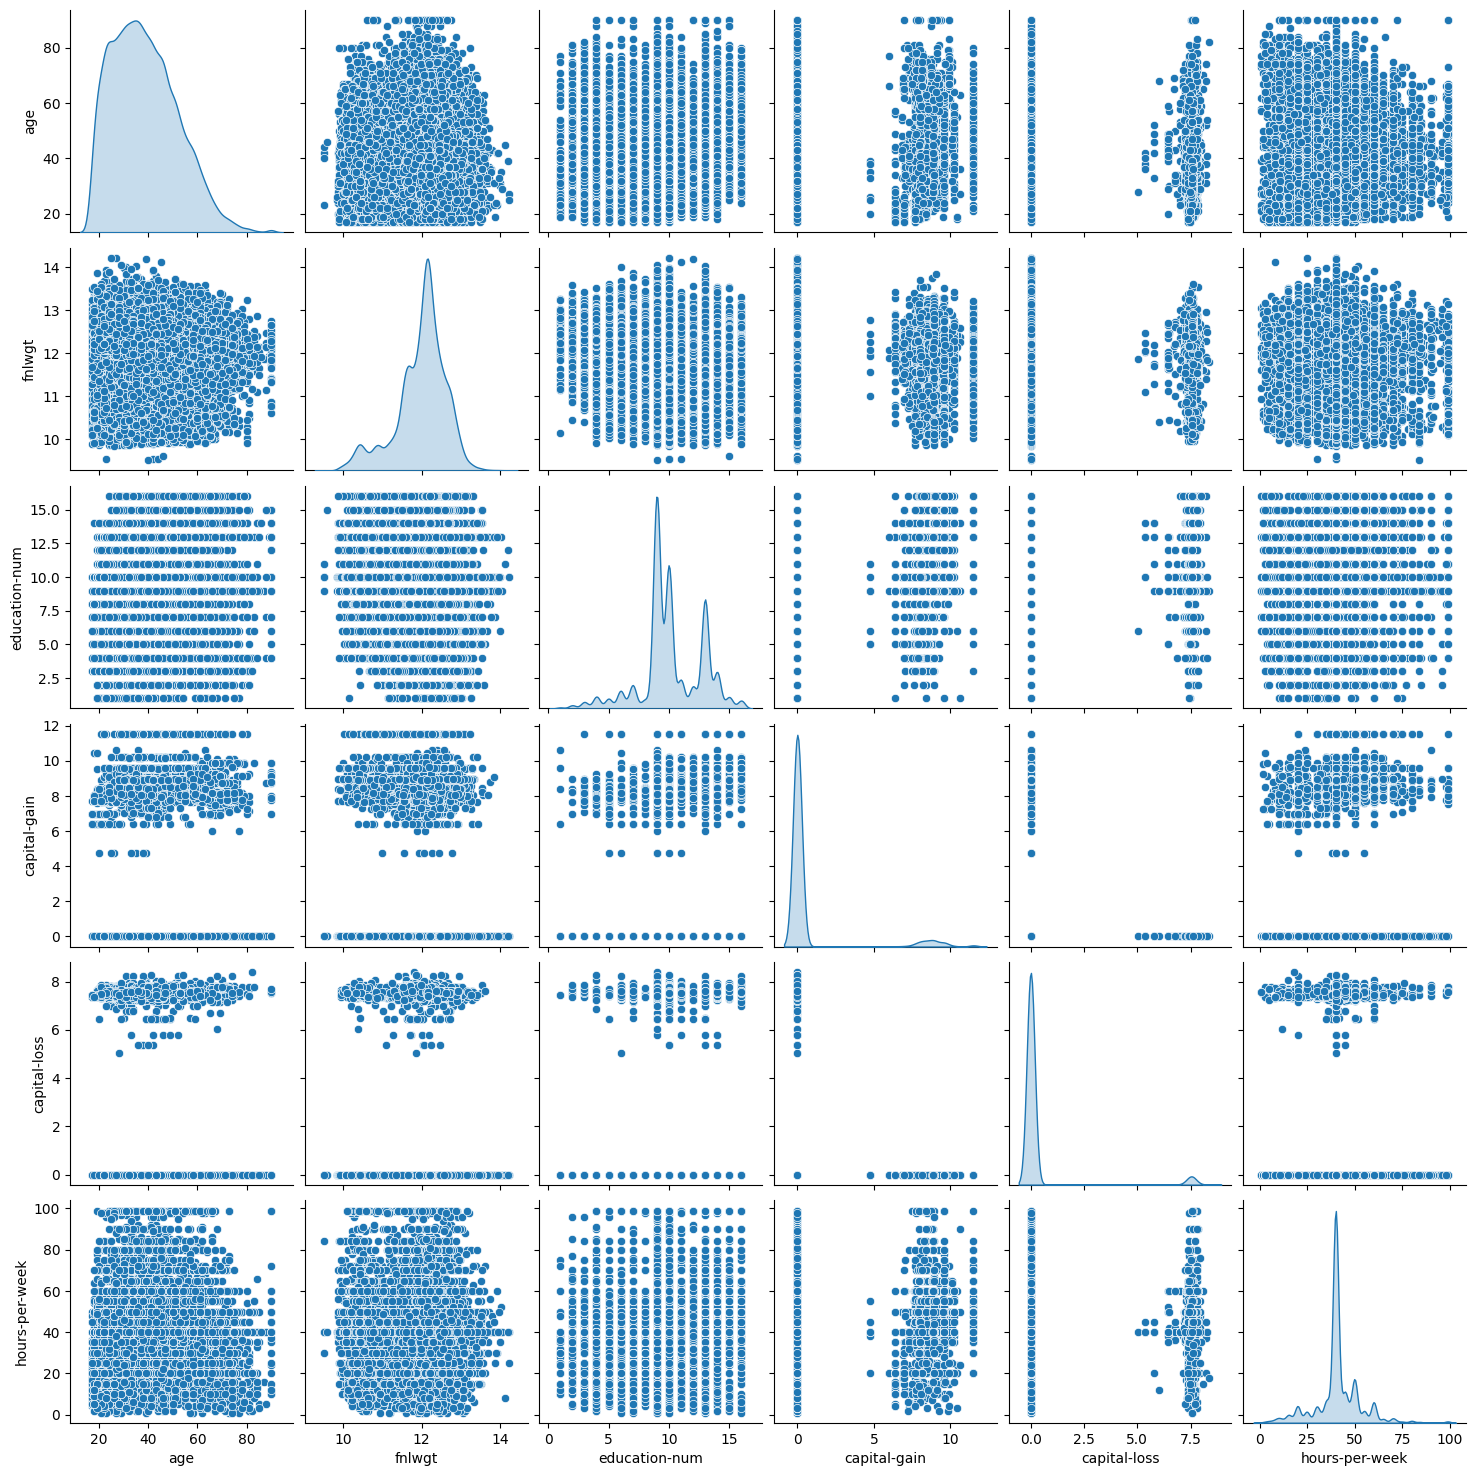

In [ ]:
sns.pairplot(df, diag_kind='kde')

# show pic
plt.show()

### 3.1.2 Correlation Matrix

Correlation Matrix for Numeric Variables:


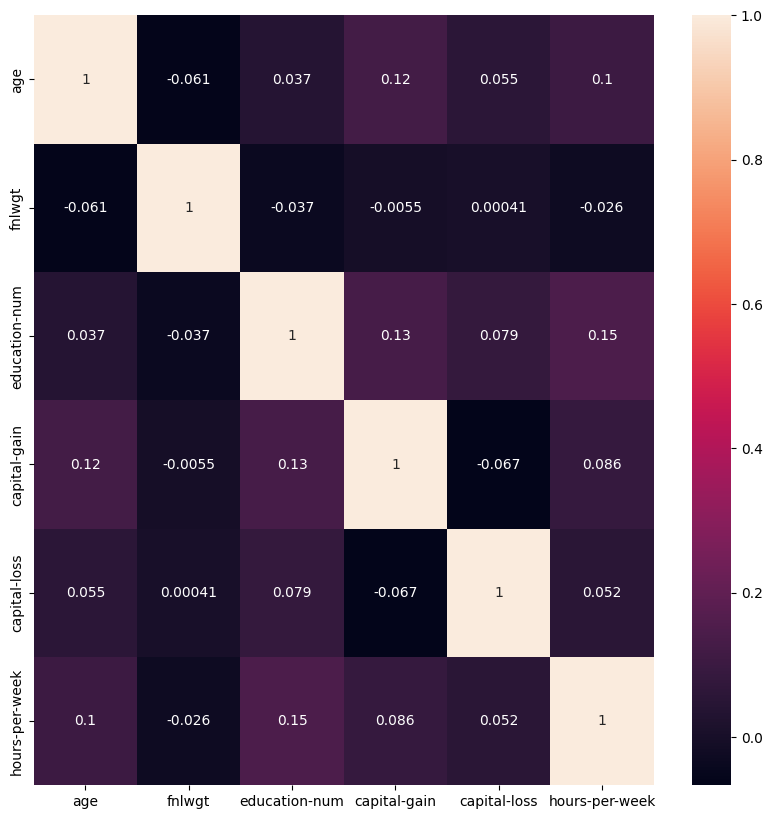

In [ ]:
# caculate correlation Matrix
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
correlation_matrix = df[numeric_features].corr()
print("Correlation Matrix for Numeric Variables:")
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

## 3.2 categorical features

In [ ]:
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
binary_features = ['sex']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']


for col in categorical_features:
    print("{:20s}: {}".format(col, df[col]. unique()))

workclass           : ['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay']
Categories (8, object): ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
                         'Self-emp-not-inc', 'State-gov', 'Without-pay']
education           : ['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', ..., '9th', 'Doctorate', '12th', '1st-4th', 'Preschool']
Length: 16
Categories (16, object): ['10th', '11th', '12th', '1st-4th', ..., 'Masters', 'Preschool',
                          'Prof-school', 'Some-college']
marital-status      : ['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated', 'Divorced', 'Married-spouse-absent', 'Married-AF-spouse']
Categories (7, object): ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
                         'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
occupation          : ['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', 'Other-servic

### 3.2.1 Label Encoding

In [ ]:
X = df[numeric_features+binary_features+categorical_features]
y = df['income']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 对二分类变量进行标签编码
label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])

# 对目标变量进行标签编码
y = label_encoder.fit_transform(y)

<ipython-input-115-71587c1ab5ed>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 3.2.2 Data Splitting

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3.2.3 Scaling & One-hot Encoding

In [ ]:
# Standardizing continuous variables
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-hot encoding of categorical variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creating a Preprocessing Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # 保留其他列（包括连续变量和已经标签编码的二分类变量）
    )
# Apply a Preprocessing Transformer
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Data preparation is complete. Subsequent model calls:
# X_train_processed, y_train, X_test_processed, y_test, feature

In [ ]:
# Get the feature name after one-hot encoding
onehot_encoder = preprocessor.transformers_[1][1]

categorical_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
feature = numeric_features + binary_features + list(categorical_feature_names)
print(len(feature))
X_train_processed

103


<36140x103 sparse matrix of type '<class 'numpy.float64'>'
	with 494230 stored elements in Compressed Sparse Row format>

# 4 KNN

Best K value: 13
Best cross-validated accuracy: 0.84
Training set accuracy: 0.86
Test set accuracy: 0.84


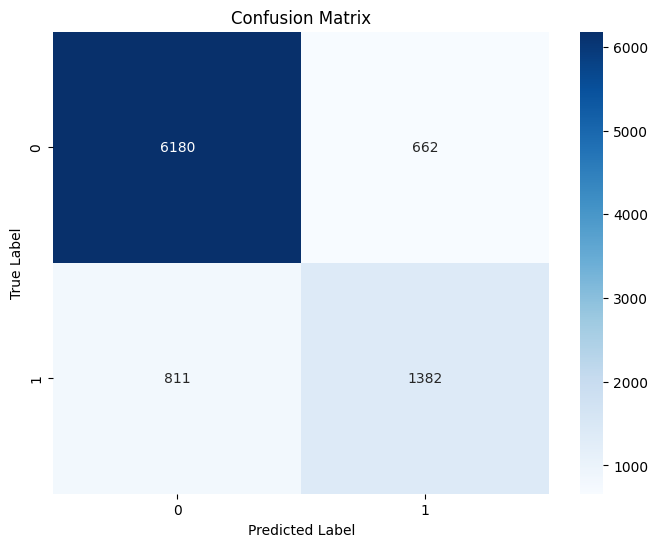


Analysis Results

·Model Overview:
We used a K-Nearest Neighbors (KNN) classifier to predict whether an individual's annual income exceeds $50,000 based on census data. The dataset contains 45175 instances with 14 features, including both categorical and numerical variables.

·Model Performance:
The accuracy of the KNN model on the training set is 0.86, indicating that the model correctly predicts the income category (above or below $50,000) for approximately 85.92% of the instances in the training set.
The accuracy of the KNN model on the test set is 0.84, indicating that the model correctly predicts the income category (above or below $50,000) for approximately 83.70% of the instances in the test set.

·Confusion Matrix:
The confusion matrix provides a detailed breakdown of the model's performance. The rows represent the true labels, and the columns represent the predicted labels.
- True Positives (TP): The number of instances where the model correctly predicted that the income is a

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNN classifier pipeline
knn = KNeighborsClassifier()
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming 'preprocessor' is defined elsewhere
    ('classifier', knn)
])

# Define the parameter grid
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]  # Try different K values
}

# Use GridSearchCV for cross-validation and parameter search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best parameter and corresponding accuracy
best_k = grid_search.best_params_['classifier__n_neighbors']
best_accuracy = grid_search.best_score_
print(f"Best K value: {best_k}")
print(f"Best cross-validated accuracy: {best_accuracy:.2f}")

# Use the best K value to make predictions on the test set
knn = KNeighborsClassifier(n_neighbors=best_k)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn)
])
model.fit(X_train, y_train)

# Predict on the training set and calculate accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training set accuracy: {train_accuracy:.2f}")

# Predict on the test set and calculate accuracy
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy:.2f}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Analysis results
analysis_result = f"""
Analysis Results

·Model Overview:
We used a K-Nearest Neighbors (KNN) classifier to predict whether an individual's annual income exceeds $50,000 based on census data. The dataset contains {len(df)} instances with {len(X.columns)} features, including both categorical and numerical variables.

·Model Performance:
The accuracy of the KNN model on the training set is {train_accuracy:.2f}, indicating that the model correctly predicts the income category (above or below $50,000) for approximately {train_accuracy * 100:.2f}% of the instances in the training set.
The accuracy of the KNN model on the test set is {test_accuracy:.2f}, indicating that the model correctly predicts the income category (above or below $50,000) for approximately {test_accuracy * 100:.2f}% of the instances in the test set.

·Confusion Matrix:
The confusion matrix provides a detailed breakdown of the model's performance. The rows represent the true labels, and the columns represent the predicted labels.
- True Positives (TP): The number of instances where the model correctly predicted that the income is above $50,000.
- False Positives (FP): The number of instances where the model incorrectly predicted that the income is above $50,000.
- True Negatives (TN): The number of instances where the model correctly predicted that the income is below $50,000.
- False Negatives (FN): The number of instances where the model incorrectly predicted that the income is below $50,000.

By analyzing the confusion matrix, we can gain insights into the types of errors the model is making and potentially identify areas for improvement.
"""

print(analysis_result)

# 5 Logistic Regression

Training set accuracy: 0.84
Test set accuracy: 0.84


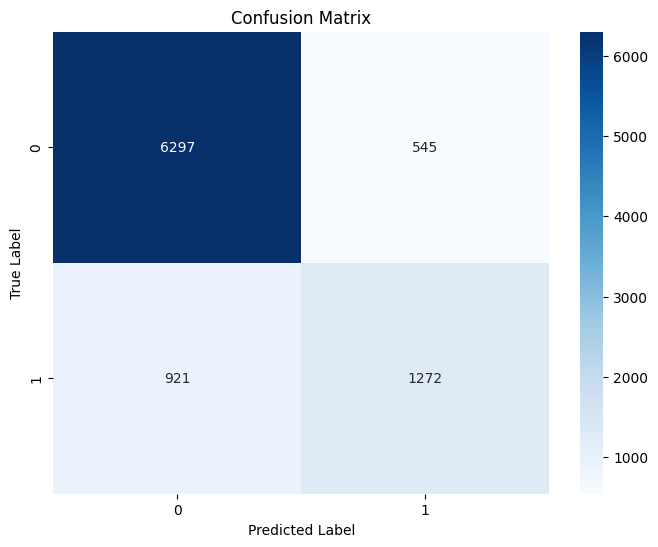

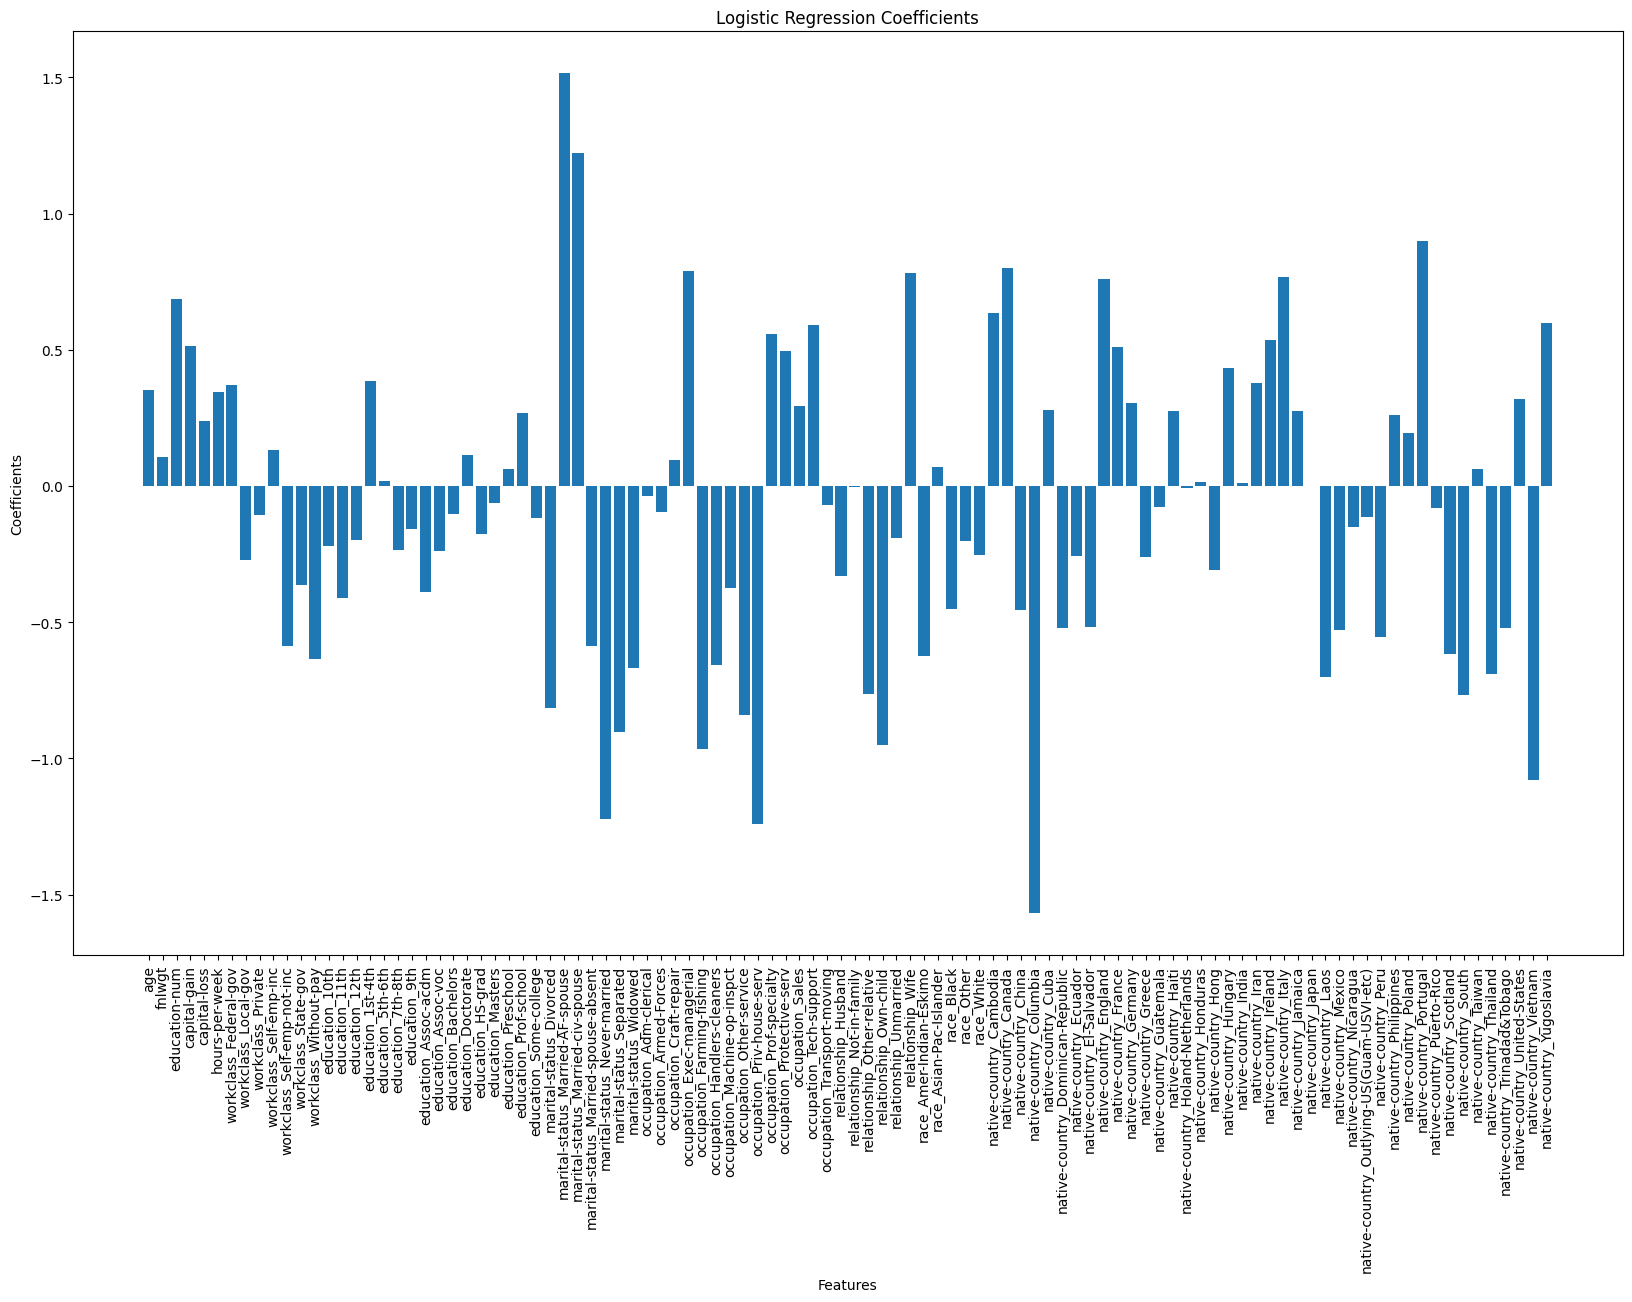


Analysis Results

·Model Overview:
We used Logistic Regression to predict whether an individual's annual income exceeds $50,000 based on census data. The dataset originally contained 45175 instances with 14 features, including both categorical and numerical variables. After removing the missing values in the target variable 'income', we split the data into a training set and a test set.

·Model Performance:
The accuracy of the Logistic Regression model on the training set is 0.84, indicating that the model correctly predicts the income category for approximately 84.49% of the instances in the training set.
The accuracy of the Logistic Regression model on the test set is 0.84, indicating that the model correctly predicts the income category for approximately 83.77% of the instances in the test set.

·Confusion Matrix:
The confusion matrix provides a detailed breakdown of the model's performance. The rows represent the true labels, and the columns represent the predicted labels.
- True 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a logistic regression pipeline
logreg = LogisticRegression(max_iter=1000)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming 'preprocessor' is defined elsewhere
    ('logreg', logreg)
])

# Train the model
model.fit(X_train, y_train)

# Predict on the training set and calculate accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training set accuracy: {train_accuracy:.2f}")

# Predict on the test set and calculate accuracy
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy:.2f}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Get feature names
feature_names = numeric_features  # Assuming 'numeric_features' is defined elsewhere
encoder = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
encoded_feature_names = encoder.get_feature_names_out(categorical_features).tolist()  # Assuming 'categorical_features' is defined elsewhere
all_feature_names = feature_names + encoded_feature_names

# Get logistic regression coefficients
coefficients = model.named_steps['logreg'].coef_[0]
# Ensure the lengths of feature names and coefficients match
min_length = min(len(all_feature_names), len(coefficients))
all_feature_names = all_feature_names[:min_length]
coefficients = coefficients[:min_length]

# Visualize feature coefficients
plt.figure(figsize=(20, 12))
plt.bar(all_feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=90)
plt.show()

# Analysis results
analysis_result = f"""
Analysis Results

·Model Overview:
We used Logistic Regression to predict whether an individual's annual income exceeds $50,000 based on census data. The dataset originally contained {len(df)} instances with {len(X.columns)} features, including both categorical and numerical variables. After removing the missing values in the target variable 'income', we split the data into a training set and a test set.

·Model Performance:
The accuracy of the Logistic Regression model on the training set is {train_accuracy:.2f}, indicating that the model correctly predicts the income category for approximately {train_accuracy * 100:.2f}% of the instances in the training set.
The accuracy of the Logistic Regression model on the test set is {test_accuracy:.2f}, indicating that the model correctly predicts the income category for approximately {test_accuracy * 100:.2f}% of the instances in the test set.

·Confusion Matrix:
The confusion matrix provides a detailed breakdown of the model's performance. The rows represent the true labels, and the columns represent the predicted labels.
- True Positives (TP): The number of instances where the model correctly predicted that the income is above $50,000.
- False Positives (FP): The number of instances where the model incorrectly predicted that the income is above $50,000.
- True Negatives (TN): The number of instances where the model correctly predicted that the income is below $50,000.
- False Negatives (FN): The number of instances where the model incorrectly predicted that the income is below $50,000.

·Feature Coefficients:
The bar chart shows the coefficients of the Logistic Regression model. Positive coefficients suggest that an increase in the corresponding feature value is associated with an increased likelihood of having an income above $50,000, while negative coefficients suggest the opposite. By analyzing these coefficients, we can identify which features have a significant impact on the prediction.

Thus, Logistic Regression provides a useful tool for predicting an individual's income level based on census data. The accuracy and the confusion matrix give us an understanding of the model's performance, and the feature coefficients help us identify the key factors influencing the prediction.
"""

print(analysis_result)

# 6 LASSO

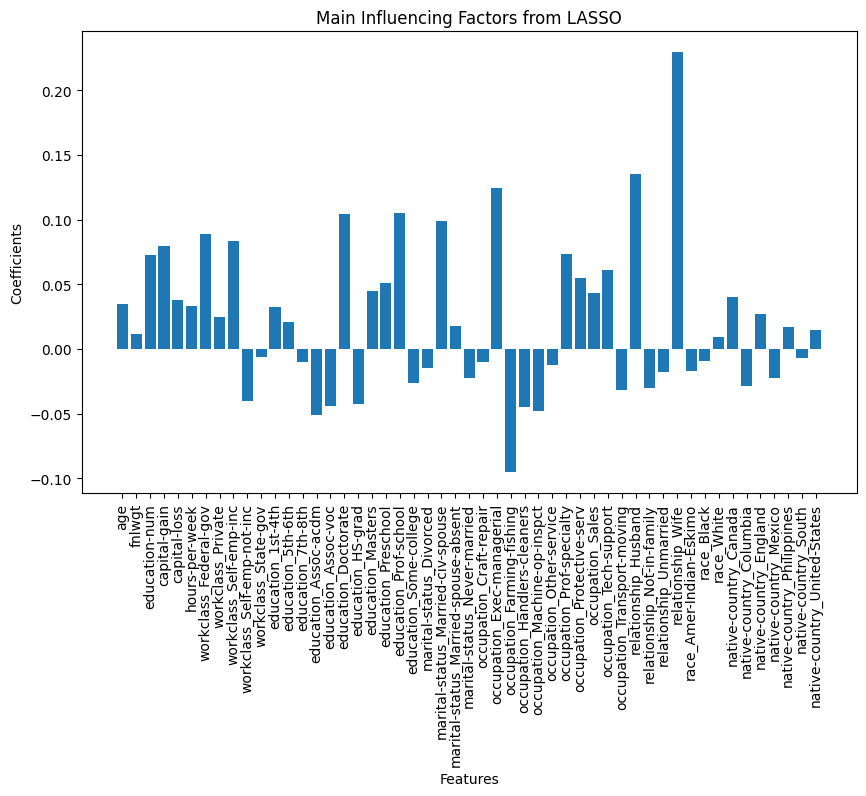


Analysis Results

·Model Overview:
We used LASSO (Least Absolute Shrinkage and Selection Operator) regression to analyze the main influencing factors for predicting whether an individual's annual income exceeds $50,000 based on census data. The original dataset contains 0 instances with 14 features, including both categorical and numerical variables. After removing the missing values in the target variable 'income', we conducted the analysis.

·Feature Selection:
LASSO regression is a powerful tool for feature selection as it can shrink some coefficients to zero, effectively eliminating less relevant features. After training the LASSO model, we identified the following non-zero coefficients, which correspond to the main influencing factors:

age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week, workclass_Federal-gov, workclass_Private, workclass_Self-emp-inc, workclass_Self-emp-not-inc, workclass_State-gov, education_1st-4th, education_5th-6th, education_7th-8th, edu

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
import numpy as np
import matplotlib.pyplot as plt

# Handle the target variable by converting it to 0 and 1
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Remove missing values in the target variable 'income'
df = df.dropna(subset=['income'])

# Create a LassoCV pipeline
lasso = LassoCV(cv=5)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming 'preprocessor' is defined elsewhere
    ('lasso', lasso)
])

# Train the model
model.fit(X_train, y_train)

# Get feature names
feature_names = numeric_features  # Assuming 'numeric_features' is defined elsewhere
encoder = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
encoded_feature_names = encoder.get_feature_names_out(categorical_features).tolist()  # Assuming 'categorical_features' is defined elsewhere
all_feature_names = feature_names + encoded_feature_names

# Get Lasso coefficients
coefficients = model.named_steps['lasso'].coef_

# Identify features with non-zero coefficients
non_zero_indices = np.nonzero(coefficients)[0]
non_zero_features = [all_feature_names[i] for i in non_zero_indices if i < len(all_feature_names)]
non_zero_coefficients = coefficients[non_zero_indices]

# Ensure the lengths of feature names and coefficients match
min_length = min(len(non_zero_features), len(non_zero_coefficients))
non_zero_features = non_zero_features[:min_length]
non_zero_coefficients = non_zero_coefficients[:min_length]

# Visualize the main influencing factors
plt.figure(figsize=(10, 6))
plt.bar(non_zero_features, non_zero_coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Main Influencing Factors from LASSO')
plt.xticks(rotation=90)
plt.show()

# Analysis results
analysis_result = f"""
Analysis Results

·Model Overview:
We used LASSO (Least Absolute Shrinkage and Selection Operator) regression to analyze the main influencing factors for predicting whether an individual's annual income exceeds $50,000 based on census data. The original dataset contains {len(df)} instances with {len(X.columns)} features, including both categorical and numerical variables. After removing the missing values in the target variable 'income', we conducted the analysis.

·Feature Selection:
LASSO regression is a powerful tool for feature selection as it can shrink some coefficients to zero, effectively eliminating less relevant features. After training the LASSO model, we identified the following non-zero coefficients, which correspond to the main influencing factors:

{', '.join(non_zero_features)}

These features have a non-zero impact on predicting an individual's income level. The magnitude and sign of the coefficients indicate the strength and direction of the relationship between the features and the target variable.

·Visualization:
The bar chart shows the coefficients of the main influencing factors. Positive coefficients suggest that an increase in the corresponding feature value is associated with an increased likelihood of having an income above $50,000, while negative coefficients suggest the opposite.

Thus, LASSO regression helps us identify the key features that play a significant role in predicting an individual's income level, which can provide valuable insights for further analysis and decision-making.
"""

print(analysis_result)

# 7 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

dt= DecisionTreeClassifier(random_state=42)
dt.fit(X_train_processed, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Get the prediction for both train and test
pred_train = dt.predict(X_train_processed)
pred_test = dt.predict(X_test_processed)

# Measure the accuracy of the model for both train and test sets
print("Accuracy on train is:", metrics.accuracy_score(y_train,pred_train))
print("Accuracy on test is:", metrics.accuracy_score(y_test,pred_test))

Accuracy on train is: 0.9999169894853348
Accuracy on test is: 0.8151632540121748


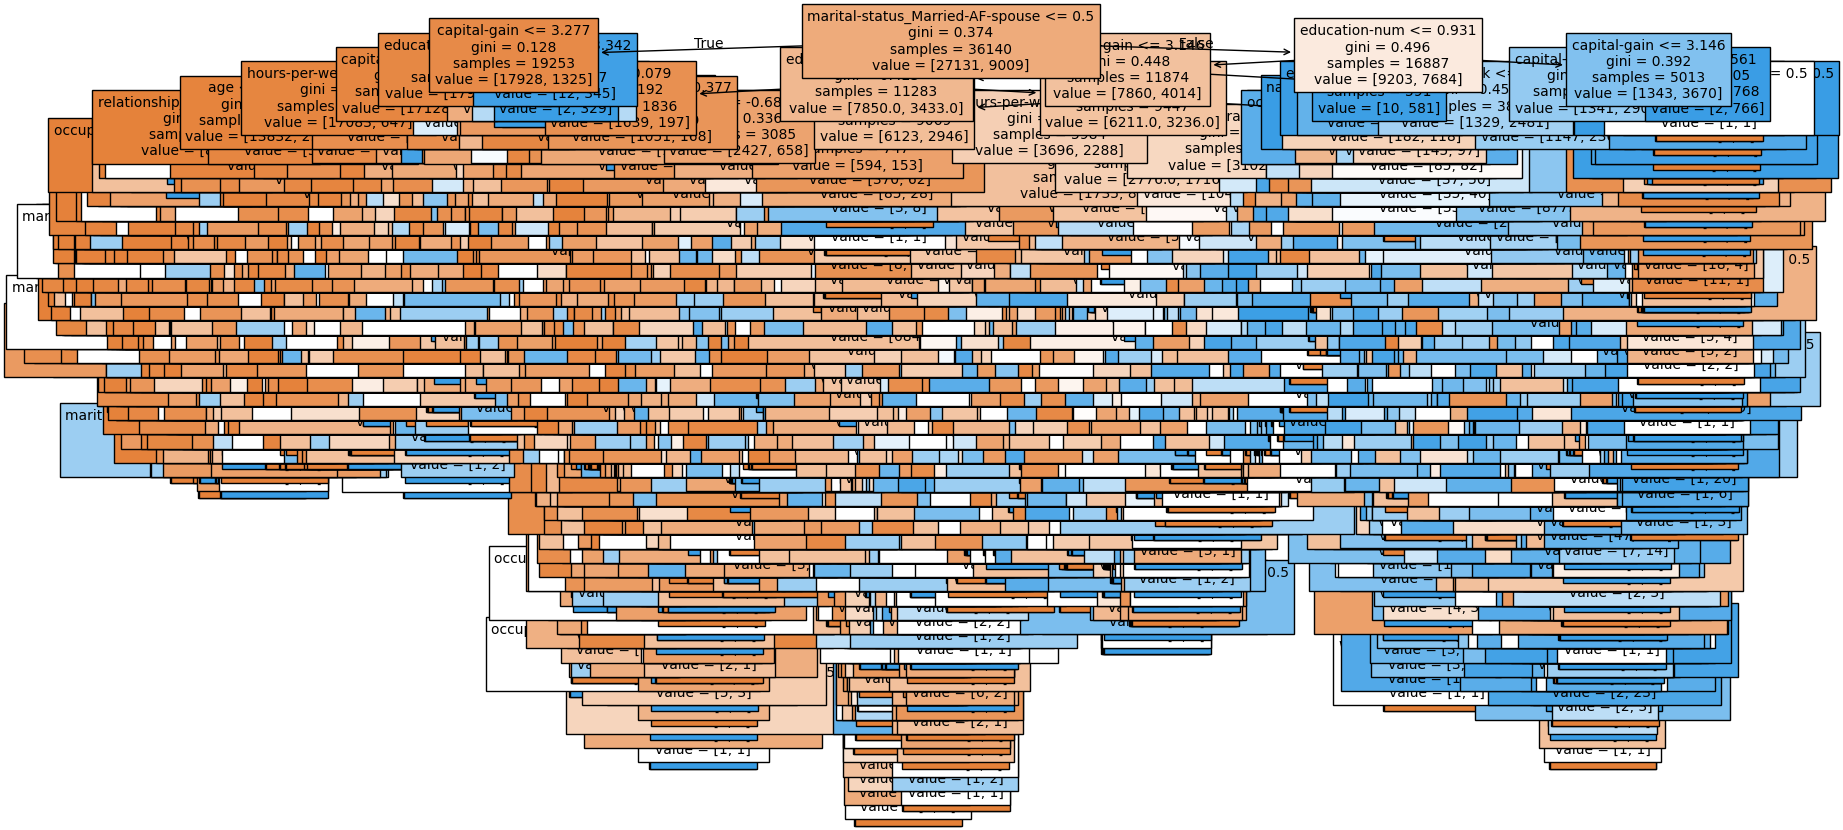

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))

tree.plot_tree(dt, feature_names=feature, fontsize=10, filled=True)

plt.show()

## 7.1 Feature Visualization

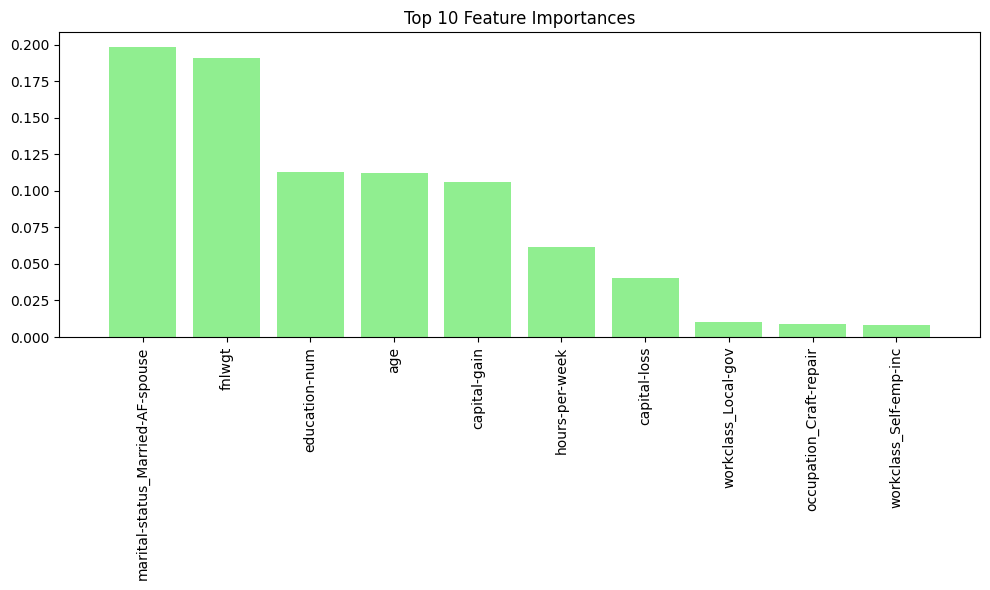

In [ ]:
importances = dt.feature_importances_
# 绘制特征重要性图
indices = np.argsort(importances)[::-1]
top_indices = indices[:10]  # 只取前10个最重要的特征

plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.bar(range(len(top_indices)), importances[top_indices], color='lightgreen', align='center')
plt.xticks(range(len(top_indices)), [feature[i] for i in top_indices], rotation=90)
plt.xlim([-1, len(top_indices)])
plt.tight_layout()
plt.show()

# 特征筛选(这里我们先不用）：
#threshold = 0.05  # 这个阈值可以根据需要调整
#selected_features = X_train_class.columns[importances > threshold].tolist()
#print(selected_features)

## 7.2 Hyperparameter Tuning

### 7.2.1 Pre-Pruning

grid search for pre pruning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [5,10,15],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier(random_state=42)
gcv = GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(X_train_processed, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [5, 10, 15]})

In [ ]:
# Retrieve the best estimator
best_model=gcv.best_estimator_

pred_train1 = best_model.predict(X_train_processed)
pred_test1 = best_model.predict(X_test_processed)

print("Accuracy on train is:", metrics.accuracy_score(y_train,pred_train1))
print("Accuracy on test is:", metrics.accuracy_score(y_test,pred_test1))

Accuracy on train is: 0.8599059214167127
Accuracy on test is: 0.854786939679026


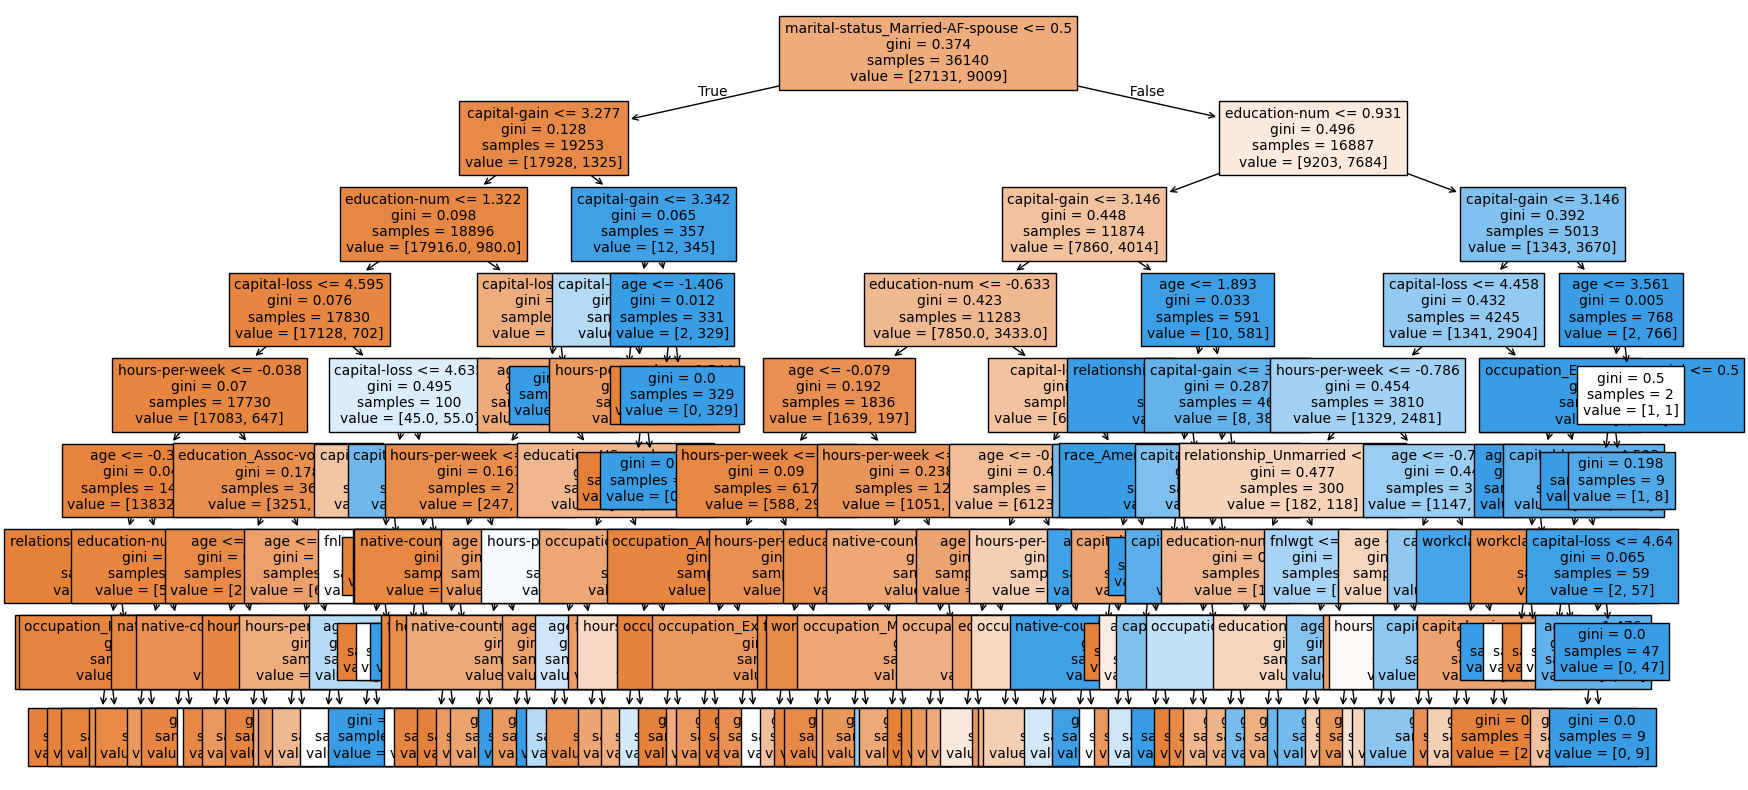

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

tree.plot_tree(best_model, feature_names=feature, fontsize=10, filled=True)

plt.show()

### 7.2.2 Post—Pruning

In [ ]:
from joblib import Parallel, delayed  # 引入并行化工具

# 生成alpha值
path = dt.cost_complexity_pruning_path(X_train_processed, y_train)
ccp_alphas = path.ccp_alphas

# 减少alpha值的数量，避免训练过多的模型
ccp_alphas = ccp_alphas[::10]  # 每隔10个取一个，减少alpha值的数量

# 使用并行化加速模型训练
def train_model(ccp_alpha):
    clf = DecisionTreeClassifier(random_state=42,  max_depth=8, min_samples_split=10, min_samples_leaf=2, ccp_alpha=ccp_alpha)
    clf.fit(X_train_processed, y_train)
    return clf

clfs = Parallel(n_jobs=-1)(delayed(train_model)(ccp_alpha) for ccp_alpha in ccp_alphas)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

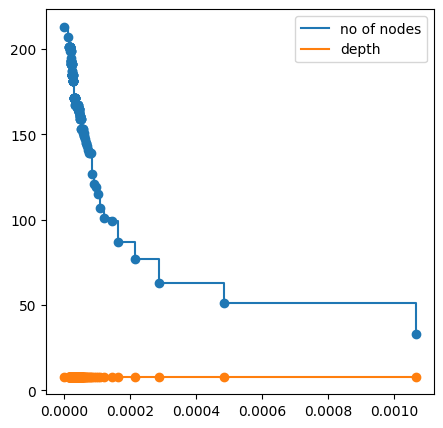

In [ ]:
# 绘制节点数和深度
plt.figure(figsize=(5, 5))
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

plt.scatter(ccp_alphas, node_counts)
plt.scatter(ccp_alphas, depth)
plt.plot(ccp_alphas, node_counts, label='no of nodes', drawstyle="steps-post")
plt.plot(ccp_alphas, depth, label='depth', drawstyle="steps-post")
plt.legend()
plt.show()

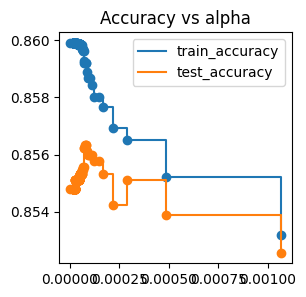

In [ ]:
# 减少准确率计算的范围，只计算部分关键模型的准确率
train_acc = []
test_acc = []
for clf in clfs:
    y_train_pred = clf.predict(X_train_processed)
    y_test_pred = clf.predict(X_test_processed)
    train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
    test_acc.append(metrics.accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(3, 3))
plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas, test_acc)
plt.plot(ccp_alphas, train_acc, label='train_accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_acc, label='test_accuracy', drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Best alpha:  0.0002
Train score 0.8571389042612064
Test score 0.8544548976203652


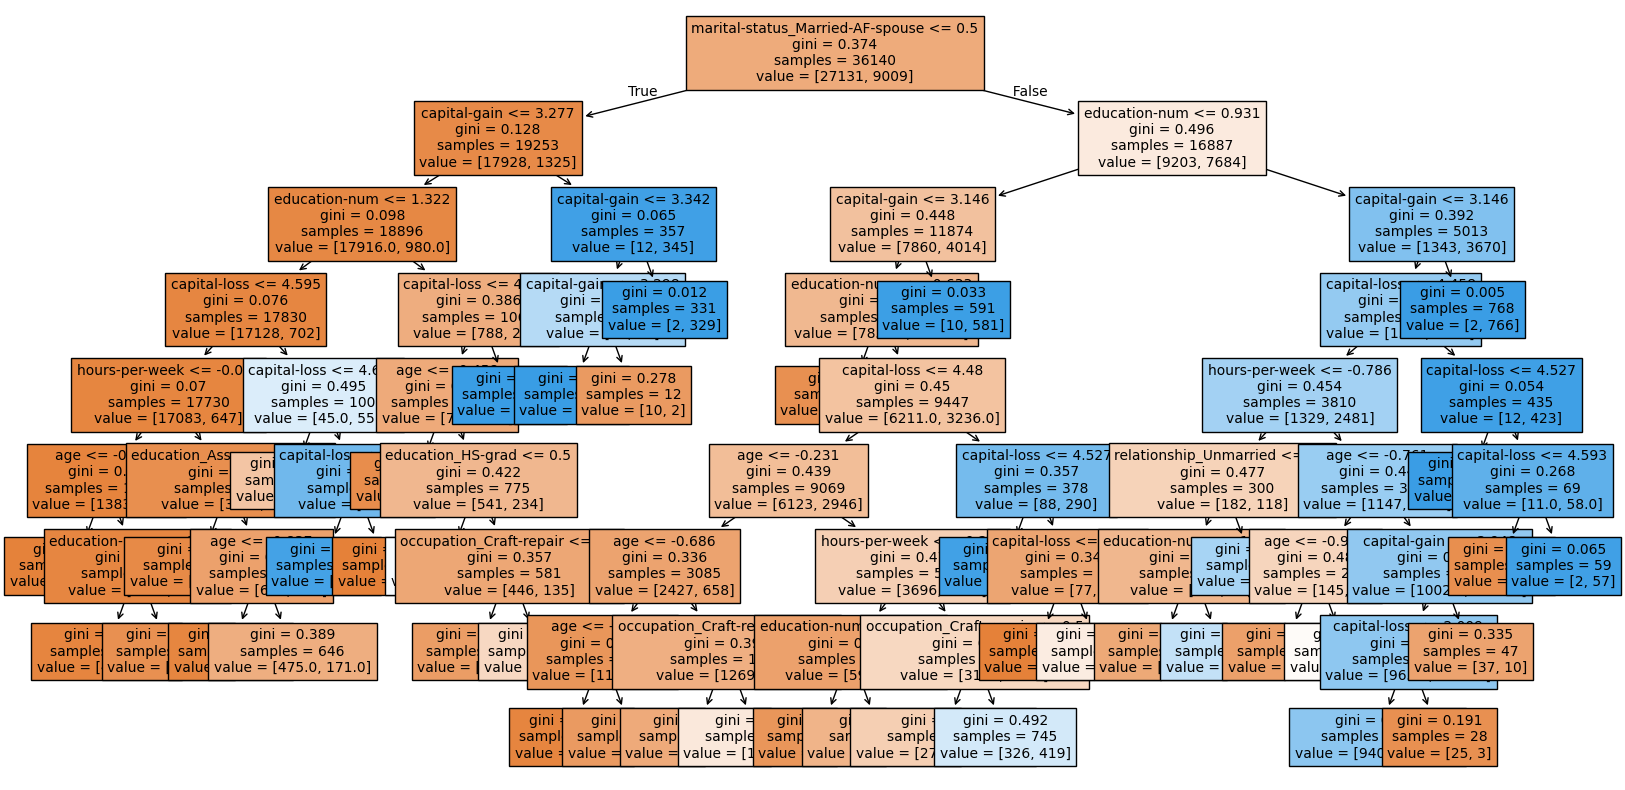

In [ ]:

# best_alpha = ccp_alphas[train_acc.index(max(train_acc))]
best_alpha = 0.0002
print("Best alpha: ", best_alpha)
clf_ = DecisionTreeClassifier(random_state=42,  max_depth=8, min_samples_split=10, min_samples_leaf=2, ccp_alpha=best_alpha)
clf_.fit(X_train_processed, y_train)

y_train_pred = clf_.predict(X_train_processed)
y_test_pred = clf_.predict(X_test_processed)

print(f'Train score {metrics.accuracy_score(y_train, y_train_pred)}')
print(f'Test score {metrics.accuracy_score(y_test, y_test_pred)}')

# 绘制最终模型的树结构
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(clf_, feature_names=feature, fontsize=10, filled=True)
plt.show()

## 7.3 Evaluation

Train score 0.8599059214167127
Test score 0.854786939679026

分类报告:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6842
           1       0.76      0.58      0.66      2193

    accuracy                           0.85      9035
   macro avg       0.82      0.76      0.78      9035
weighted avg       0.85      0.85      0.85      9035



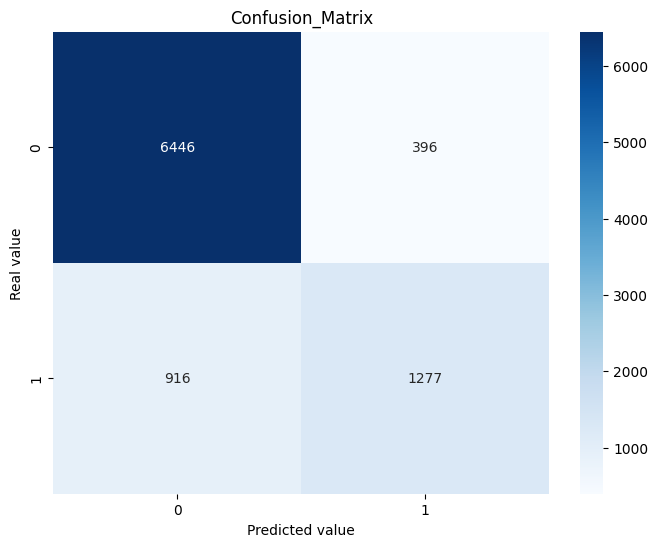

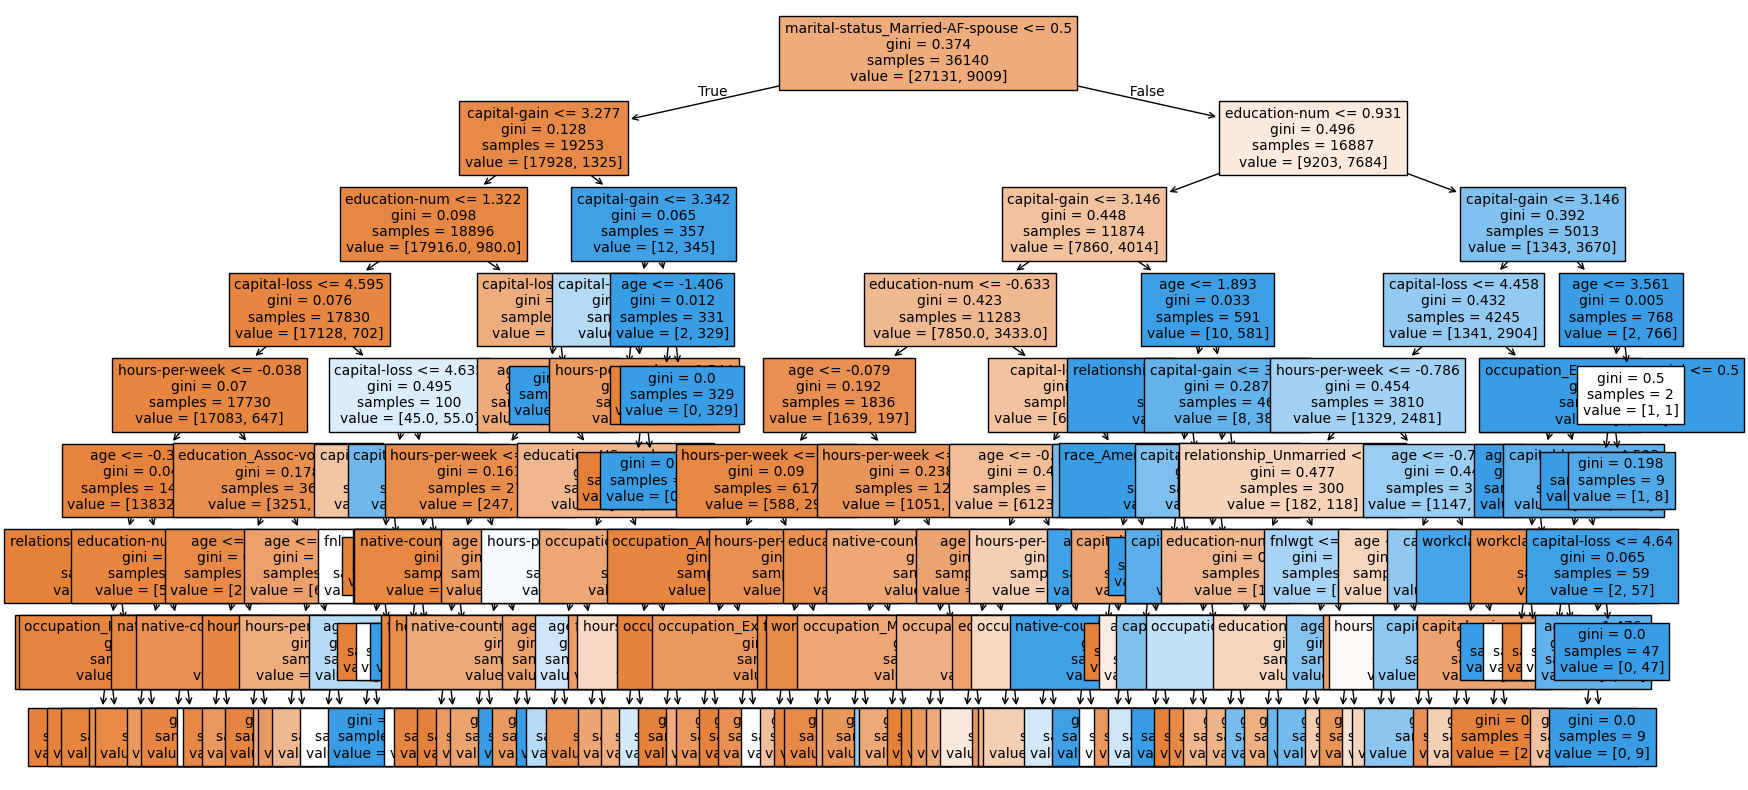

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
dt2 = DecisionTreeClassifier(criterion="gini", max_depth=8, min_samples_split=10, min_samples_leaf=2, random_state=42)
dt2.fit(X_train_processed, y_train)
y_train_pred = dt2.predict(X_train_processed)
y_test_pred = dt2.predict(X_test_processed)

print(f'Train score {metrics.accuracy_score(y_train, y_train_pred)}')
print(f'Test score {metrics.accuracy_score(y_test, y_test_pred)}')

# 打印分类报告
print("\n分类报告:")
print(classification_report(y_test, y_test_pred))

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion_Matrix')
plt.ylabel('Real value')
plt.xlabel('Predicted value')
plt.show()

fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(dt2, feature_names=feature, fontsize=10, filled=True)
plt.show()

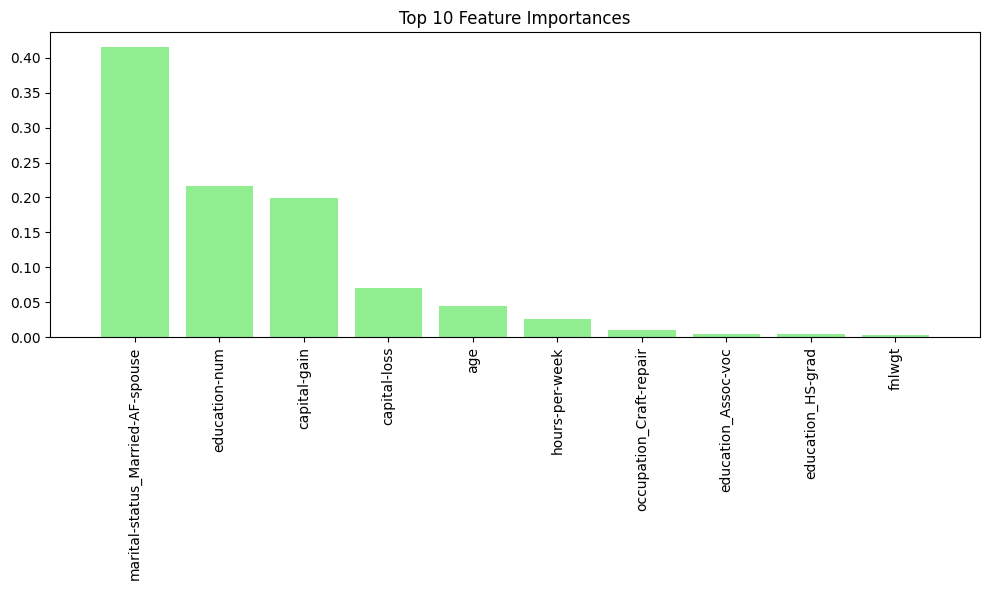

In [ ]:
importances = dt2.feature_importances_
# 绘制特征重要性图
indices = np.argsort(importances)[::-1]
top_indices = indices[:10]  # 只取前10个最重要的特征

plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.bar(range(len(top_indices)), importances[top_indices], color='lightgreen', align='center')
plt.xticks(range(len(top_indices)), [feature[i] for i in top_indices], rotation=90)
plt.xlim([-1, len(top_indices)])
plt.tight_layout()
plt.show()

# 8 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=4).fit(X_train_processed, y_train)

In [ ]:
from sklearn import metrics
print("accuracy on training:", metrics.accuracy_score(y_train, rfc.predict(X_train_processed)))
print("accuracy on testing:", metrics.accuracy_score(y_test, rfc.predict(X_test_processed)))

accuracy on training: 0.9993359158826784
accuracy on testing: 0.8464858882125069


## 8.1 Feature Visualization

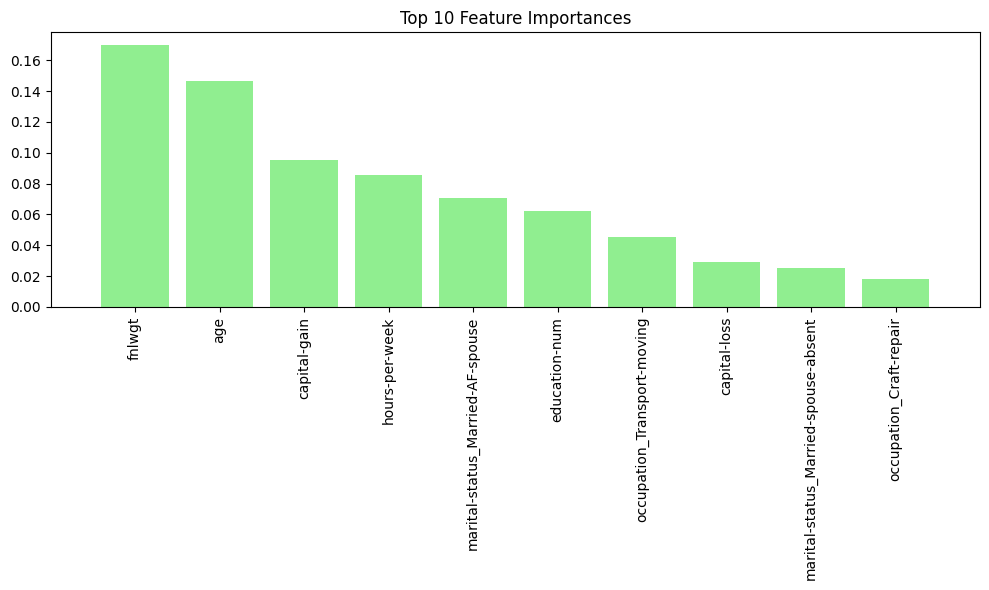

In [ ]:
importances = rfc.feature_importances_
# 绘制特征重要性图
indices = np.argsort(importances)[::-1]
top_indices = indices[:10]  # 只取前10个最重要的特征

plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.bar(range(len(top_indices)), importances[top_indices], color='lightgreen', align='center')
plt.xticks(range(len(top_indices)), [feature[i] for i in top_indices], rotation=90)
plt.xlim([-1, len(top_indices)])
plt.tight_layout()
plt.show()

# 特征筛选(这里我们先不用）：
#threshold = 0.05  # 这个阈值可以根据需要调整
#selected_features = X_train_class.columns[importances > threshold].tolist()
#print(selected_features)

## 8.2 Hyperparameter Tuning

RandomizedSearchCV Pre-Pruning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,200),
              'max_depth': randint(1,10)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = param_dist, n_iter=50, n_jobs=-1, random_state=42)


# Fit the random search object to the data
rand_search.fit(X_train_processed, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e1cd4d98710>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e1cd47b4190>},
                   random_state=42)

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Generate predictions with the best model
y_pred = best_rf.predict(X_test_processed)

print("accuracy on training:", metrics.accuracy_score(y_train, best_rf.predict(X_train_processed)))
print("accuracy on testing:", metrics.accuracy_score(y_test, best_rf.predict(X_test_processed)))

Best hyperparameters: {'max_depth': 9, 'n_estimators': 64}
accuracy on training: 0.8562811289429995
accuracy on testing: 0.8498063087991146


## 8.3 Gradient Boosting (temp)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, verbose=1, random_state=42).fit(X_train_processed, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.8218            4.72s
         2           0.7468            4.57s
         3           0.7083            4.37s
         4           0.6893            4.13s
         5           0.6866            3.97s
         6           0.6816            3.82s
         7           0.6722            3.73s
         8           0.6642            3.64s
         9           0.6603            3.57s
        10           0.6549            3.51s
        20 2898859111920849016584436855971720922054967341959151414938372021433623955807082245333402157881621988060074190412277548807356416.0000            2.97s
        30 2898859111920849016584436855971720922054967341959151414938372021433623955807082245333402157881621988060074190412277548807356416.0000            2.53s
        40 2898859111920849016584436855971720922054967341959151414938372021433623955807082245333402157881621988060074190412277548807356416.0000            2.15s
        50 2898859111

In [ ]:
print("accuracy on training:", metrics.accuracy_score(y_train, gbt.predict(X_train_processed)))
print("accuracy on testing:", metrics.accuracy_score(y_test, gbt.predict(X_test_processed)))

importance = pd.Series(gbt.feature_importances_, index=feature)
importance.sort_values(ascending=False)

accuracy on training: 0.8653292750415053
accuracy on testing: 0.8573325954620918


marital-status_Married-AF-spouse    0.377312
education-num                       0.211578
capital-gain                        0.148912
marital-status_Divorced             0.135546
capital-loss                        0.044586
                                      ...   
race_White                          0.000000
education_HS-grad                   0.000000
native-country_Columbia             0.000000
native-country_Cuba                 0.000000
education_7th-8th                   0.000000
Length: 103, dtype: float64

## 8.4 Evaluation

准确率: 0.8498

分类报告:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6842
           1       0.78      0.53      0.63      2193

    accuracy                           0.85      9035
   macro avg       0.82      0.74      0.77      9035
weighted avg       0.84      0.85      0.84      9035



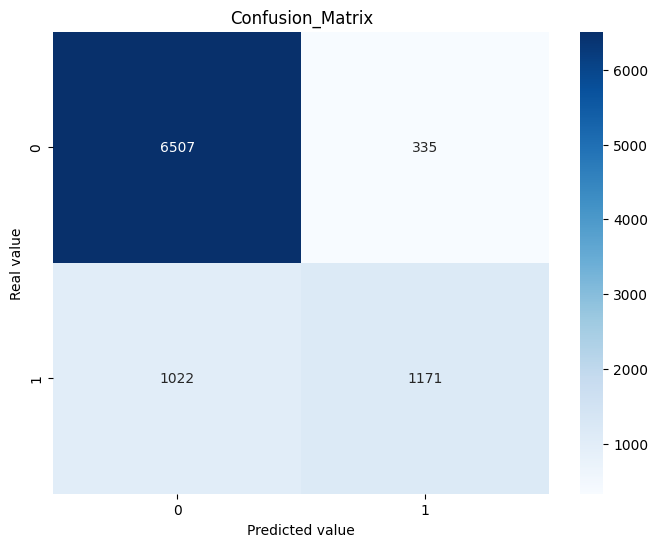

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# dt2 = RandomForestClassifier(criterion="gini", max_depth=2, min_samples_split=5, ccp_alpha=0.0004, random_state=42)
# dt2.fit(X_train_processed, y_train)
y_pred = best_rf.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f"准确率: {accuracy:.4f}")

# 打印分类报告
print("\n分类报告:")
print(classification_report(y_test, y_pred))

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion_Matrix')
plt.ylabel('Real value')
plt.xlabel('Predicted value')
plt.show()


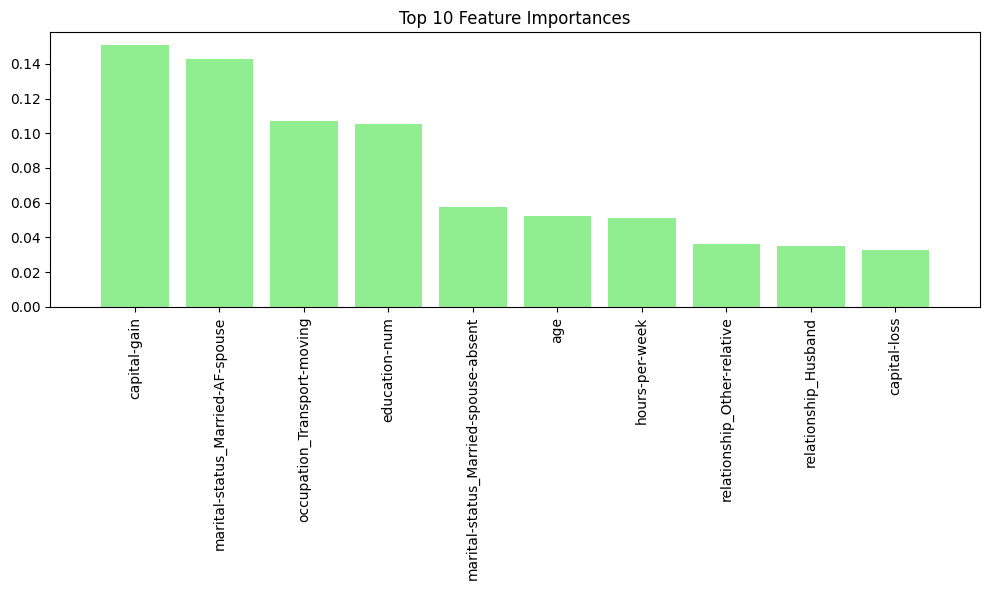

In [ ]:
importances = best_rf.feature_importances_
# 绘制特征重要性图
indices = np.argsort(importances)[::-1]
top_indices = indices[:10]  # 只取前10个最重要的特征

plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.bar(range(len(top_indices)), importances[top_indices], color='lightgreen', align='center')
plt.xticks(range(len(top_indices)), [feature[i] for i in top_indices], rotation=90)
plt.xlim([-1, len(top_indices)])
plt.tight_layout()
plt.show()